# **Importing Packages**

Make sure to install the packages before importing if needed.

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
import seaborn as sns
import os
import re
import glob
# import bbknn
# import joypy
import igraph
import leidenalg
import mygene

from scipy import sparse
from scipy.stats import gaussian_kde
from textwrap import fill
from matplotlib import cm

# **Loading Data**

To see requirements for all AnnData objects (CELLxCELL): https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md.

In [3]:
# Make sure to set your own path to the data file
# adata = sc.read_h5ad(".../.../77k_AD_PD_CTRL.h5ad")

## Path - Elodie
#adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad")

## Path - Yara 
adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad")

In [4]:
# Creating adata_raw (needed for DE)
adata_raw = adata.copy()

In [3]:
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'AD_status_colors', 'batch_condition', 'cell_type_colors', 'citation', 'class_colors', 'd

The studied conditions are the following:

In [4]:
studied_conditions = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()
studied_conditions

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/3882879008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  studied_conditions = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


disease                        AD_status  Parkinson_disease
dementia || Alzheimer disease  No         No                       0
                                          Yes                      0
                               Yes        No                   31949
                                          Yes                      0
dementia || Parkinson disease  No         No                       0
                                          Yes                   7772
                               Yes        No                       0
                                          Yes                      0
normal                         No         No                   37331
                                          Yes                      0
                               Yes        No                       0
                                          Yes                      0
dtype: int64

## **Reduced Dataset's Metadata**

### *adata*
scanpy shows a structured summary:

In [5]:
adata

AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'AD_status_colors', 'batch_condition', 'cell_type_colors', 'citation', 'class_colors', 'disease_colors', 'genome', 'organis

In [12]:
# This is the sparse matrix
print("adata.X type is :", type(adata.X))

print(adata.X[:5, :5])

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (1, 2)	3.0
  (3, 4)	1.0
  (4, 4)	5.0


In [13]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (77052, 34176).
There are 77052 cells and 34176 genes in this dataset.


### *adata.obs*

In [15]:
adata.obs.head()

Source  n_genes  n_counts   class  \
barcodekey                                                         
Donor_865-1-AAACCCACAAGACTGG-0      R     3397    8087.0  Immune   
Donor_865-1-AAACCCAGTGAATATG-0      R     6829   28101.0      EN   
Donor_865-1-AAACCCATCTTTCCGG-0      R     2628    5522.0   Oligo   
Donor_865-1-AAACGAATCAATCGGT-0      R     5998   24035.0      IN   
Donor_865-1-AAACGAATCGTTCTAT-0      R     2425    5217.0   Oligo   

                                    subclass           subtype  \
barcodekey                                                       
Donor_865-1-AAACCCACAAGACTGG-0         Micro             Micro   
Donor_865-1-AAACCCAGTGAATATG-0  EN_L3_5_IT_2  EN_L3_5_IT_2_MET   
Donor_865-1-AAACCCATCTTTCCGG-0         Oligo      Oligo_OPALIN   
Donor_865-1-AAACGAATCAATCGGT-0        IN_SST      IN_SST_EDNRA   
Donor_865-1-AAACGAATCGTTCTAT-0         Oligo      Oligo_OPALIN   

                               tissue_ontology_term_id tissue_type  \
barcodekey                                                           
Donor_865-1-AAACCCACAAGACTGG-0          UBERON:0009834      tissue   
Donor_865-1-AAACCCAGTGAATATG-0          UBERON:0009834      tissue   
Donor_865-1-AAACCCATCTTTCCGG-0          UBERON:0009834      tissue   
Donor_865-1-AAACGAATCAATCGGT-0          UBERON:0009834      tissue   
Donor_865-1-AAACGAATCGTTCTAT-0          UBERON:0009834      tissue   

                               assay_ontology_term_id  \
barcodekey                                              
Donor_865-1-AAACCCACAAGACTGG-0            EFO:0009922   
Donor_865-1-AAACCCAGTGAATATG-0            EFO:0009922   
Donor_865-1-AAACCCATCTTTCCGG-0            EFO:0009922   
Donor_865-1-AAACGAATCAATCGGT-0            EFO:0009922   
Donor_865-1-AAACGAATCGTTCTAT-0            EFO:0009922   

                               cell_type_ontology_term_id  ...  \
barcodekey                                                 ...   
Donor_865-1-AAACCCACAAGACTGG-0                 CL:0000129  ...   
Donor_865-1-AAACCCAGTGAATATG-0                 CL:4023040  ...   
Donor_865-1-AAACCCATCTTTCCGG-0                 CL:0000128  ...   
Donor_865-1-AAACGAATCAATCGGT-0                 CL:4023017  ...   
Donor_865-1-AAACGAATCGTTCTAT-0                 CL:0000128  ...   

                               genetic_ancestry  \
barcodekey                                        
Donor_865-1-AAACCCACAAGACTGG-0       East Asian   
Donor_865-1-AAACCCAGTGAATATG-0       East Asian   
Donor_865-1-AAACCCATCTTTCCGG-0       East Asian   
Donor_865-1-AAACGAATCAATCGGT-0       East Asian   
Donor_865-1-AAACGAATCGTTCTAT-0       East Asian   

                                      disease_ontology_term_id  \
barcodekey                                                       
Donor_865-1-AAACCCACAAGACTGG-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACCCAGTGAATATG-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACCCATCTTTCCGG-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACGAATCAATCGGT-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACGAATCGTTCTAT-0  MONDO:0001627 || MONDO:0004975   

                                                                        cell_type  \
barcodekey                                                                          
Donor_865-1-AAACCCACAAGACTGG-0                                    microglial cell   
Donor_865-1-AAACCCAGTGAATATG-0  L2/3-6 intratelencephalic projecting glutamate...   
Donor_865-1-AAACCCATCTTTCCGG-0                                    oligodendrocyte   
Donor_865-1-AAACGAATCAATCGGT-0                 sst GABAergic cortical interneuron   
Donor_865-1-AAACGAATCGTTCTAT-0                                    oligodendrocyte   

                                    assay                        disease  \
barcodekey                                                                 
Donor_865-1-AAACCCACAAGACTGG-0  10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AAACCCAGTGAATATG-0  10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AAAC

In [11]:
print("The keys of adata.obs are the following:", adata.obs.keys())

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts   class  \
barcodekey                                                         
Donor_865-1-AAACCCACAAGACTGG-0      R     3397    8087.0  Immune   
Donor_865-1-AAACCCAGTGAATATG-0      R     6829   28101.0      EN   
Donor_865-1-AAACCCATCTTTCCGG-0      R     2628    5522.0   Oligo   
Donor_865-1-AAACGAATCAATCGGT-0      R     5998   24035.0      IN   
Donor_865-1-AAACGAATCGTTCTAT-0      R     2425    5217.0   Oligo   

                                    subclass           subtype  \
barcodekey                                                       
Donor_865-1-AAACCCACAAGACTGG-0         Micro             Micro   
Donor_865-1-AAACCCAGTGAATATG-0  EN_L3_5_IT_2  EN_L3_5_IT_2_MET   
Donor_865-1-AAACCCATCTTTCCGG-0         Oligo      Oligo_OPALIN   
Donor_865-1-AAACGAATCAATCGGT-0        IN_SST      IN_SST_EDNRA   
Donor_865-1-AAACGAATCGTTCTAT-0         Oligo      Oligo_OPALIN   

                               tissue_ontology_term_id tissue_type  \
barcodekey                                                           
Donor_865-1-AAACCCACAAGACTGG-0          UBERON:0009834      tissue   
Donor_865-1-AAACCCAGTGAATATG-0          UBERON:0009834      tissue   
Donor_865-1-AAACCCATCTTTCCGG-0          UBERON:0009834      tissue   
Donor_865-1-AAACGAATCAATCGGT-0          UBERON:0009834      tissue   
Donor_865-1-AAACGAATCGTTCTAT-0          UBERON:0009834      tissue   

                               assay_ontology_term_id  \
barcodekey                                              
Donor_865-1-AAACCCACAAGACTGG-0            EFO:0009922   
Donor_865-1-AAACCCAGTGAATATG-0            EFO:0009922   
Donor_865-1-AAACCCATCTTTCCGG-0            EFO:0009922   
Donor_865-1-AAACGAATCAATCGGT-0            EFO:0009922   
Donor_865-1-AAACGAATCGTTCTAT-0            EFO:0009922   

                               cell_type_ontology_term_id  ...  \
barcodekey                                                 ...   
Donor_865-1-AAACCCACAAGACTGG-0                 CL:0000129  ...   
Donor_865-1-AAACCCAGTGAATATG-0                 CL:4023040  ...   
Donor_865-1-AAACCCATCTTTCCGG-0                 CL:0000128  ...   
Donor_865-1-AAACGAATCAATCGGT-0                 CL:4023017  ...   
Donor_865-1-AAACGAATCGTTCTAT-0                 CL:0000128  ...   

                               genetic_ancestry  \
barcodekey                                        
Donor_865-1-AAACCCACAAGACTGG-0       East Asian   
Donor_865-1-AAACCCAGTGAATATG-0       East Asian   
Donor_865-1-AAACCCATCTTTCCGG-0       East Asian   
Donor_865-1-AAACGAATCAATCGGT-0       East Asian   
Donor_865-1-AAACGAATCGTTCTAT-0       East Asian   

                                      disease_ontology_term_id  \
barcodekey                                                       
Donor_865-1-AAACCCACAAGACTGG-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACCCAGTGAATATG-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACCCATCTTTCCGG-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACGAATCAATCGGT-0  MONDO:0001627 || MONDO:0004975   
Donor_865-1-AAACGAATCGTTCTAT-0  MONDO:0001627 || MONDO:0004975   

                                                                        cell_type  \
barcodekey                                                                          
Donor_865-1-AAACCCACAAGACTGG-0                                    microglial cell   
Donor_865-1-AAACCCAGTGAATATG-0  L2/3-6 intratelencephalic projecting glutamate...   
Donor_865-1-AAACCCATCTTTCCGG-0                                    oligodendrocyte   
Donor_865-1-AAACGAATCAATCGGT-0                 sst GABAergic cortical interneuron   
Donor_865-1-AAACGAATCGTTCTAT-0                                    oligodendrocyte   

                                    assay                        disease  \
barcodekey                                                                 
Donor_865-1-AAACCCACAAGACTGG-0  10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AAACCCAGTGAATATG-0  10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AAAC

In [17]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


#### How many donors per disease type?

In [10]:
donors_per_disease = pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
donors_per_disease_summary = donors_per_disease.sum()

print("Number of donors per disease status:")
print(donors_per_disease_summary)

Number of donors per disease status:
disease
dementia || Alzheimer disease    31949
dementia || Parkinson disease     7772
normal                           37331
dtype: int64


In [20]:
print("Donor Names : \n", adata.obs_names)

Donor Names : 
 Index(['Donor_865-1-AAACCCACAAGACTGG-0', 'Donor_865-1-AAACCCAGTGAATATG-0',
       'Donor_865-1-AAACCCATCTTTCCGG-0', 'Donor_865-1-AAACGAATCAATCGGT-0',
       'Donor_865-1-AAACGAATCGTTCTAT-0', 'Donor_865-1-AAACGCTAGCGGTATG-0',
       'Donor_865-1-AAACGCTCAGCTCGGT-0', 'Donor_865-1-AAACGCTTCGCAATTG-0',
       'Donor_865-1-AAAGAACAGGTTGACG-0', 'Donor_865-1-AAAGAACCACTCATAG-0',
       ...
       'Donor_1146-2-TTTGGAGCACTTTATC-1', 'Donor_1146-2-TTTGGAGGTGGTTCTA-1',
       'Donor_1146-2-TTTGGTTAGTACGTCT-1', 'Donor_1146-2-TTTGGTTCATAACTCG-1',
       'Donor_1146-2-TTTGGTTGTACTAGCT-1', 'Donor_1146-2-TTTGGTTGTATCGTTG-1',
       'Donor_1146-2-TTTGGTTTCGAGATGG-1', 'Donor_1146-2-TTTGTTGAGTATTGCC-1',
       'Donor_1146-2-TTTGTTGCACCAGGTC-1', 'Donor_1146-2-TTTGTTGTCCCTAGGG-1'],
      dtype='object', name='barcodekey', length=77052)


### How many cells per disease type?

In [19]:
for disease_type in disease_list : 
    print(disease_type, ":", len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells.")

dementia || Alzheimer disease : 31949  cells.
dementia || Parkinson disease : 7772  cells.
normal : 37331  cells.


### *adata.var*
Gene metadata:

In [22]:
print("First 5 rows from adata.var:")
print(adata.var.head(5))

First 5 rows from adata.var:
                gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   
ENSG00000000419      DPM1  3001206                False         DPM1   
ENSG00000000457     SCYL3  1941205                False        SCYL3   
ENSG00000000460  C1orf112  1798664                False        FIRRM   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   
ENSG00000000419    NCBITaxon:9606            gene           1262   
ENSG00000000457    NCBITaxon:9606            gene           2916   
ENSG00000000460    NCBITaxon:9606            gene           2661   

                   feature_type  
ENSG00000000003  protein_coding  
ENSG00000000005  protein_coding  
ENSG00000000419  protein_co

In [23]:
print("adata.var.keys :", adata.var.keys())

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


In [21]:
print("Gene Names : \n", adata.var_names) # These are Ensembl IDs

Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000288600', 'ENSG00000288602', 'ENSG00000288605',
       'ENSG00000288606', 'ENSG00000288611', 'ENSG00000288612',
       'ENSG00000288622', 'ENSG00000288637', 'ENSG00000288642',
       'ENSG00000288643'],
      dtype='object', length=34176)


### *adata.obsm*
It might be interesting and informative to compare existing embeddings to our results.

In [26]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)


Based on the existing UMAPs, there does not seem to be a batch effect in our data. Remove the # to view the corresponding UMAP:

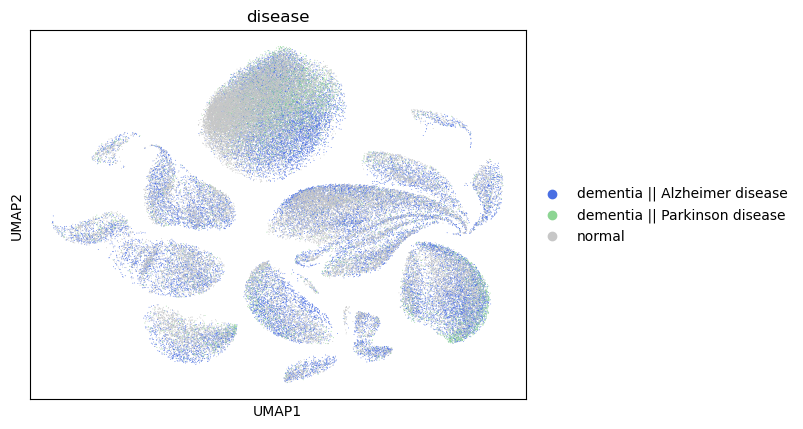

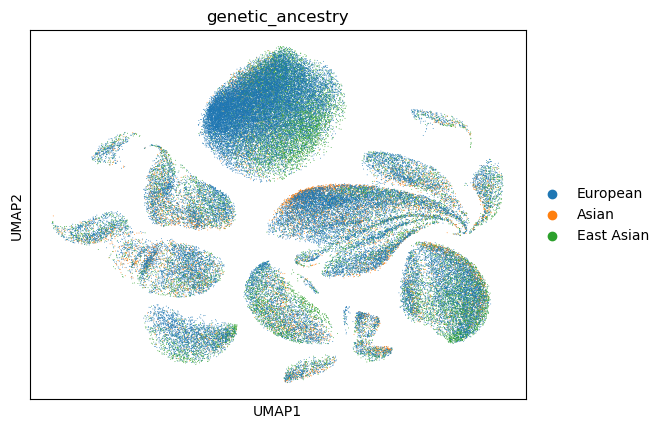

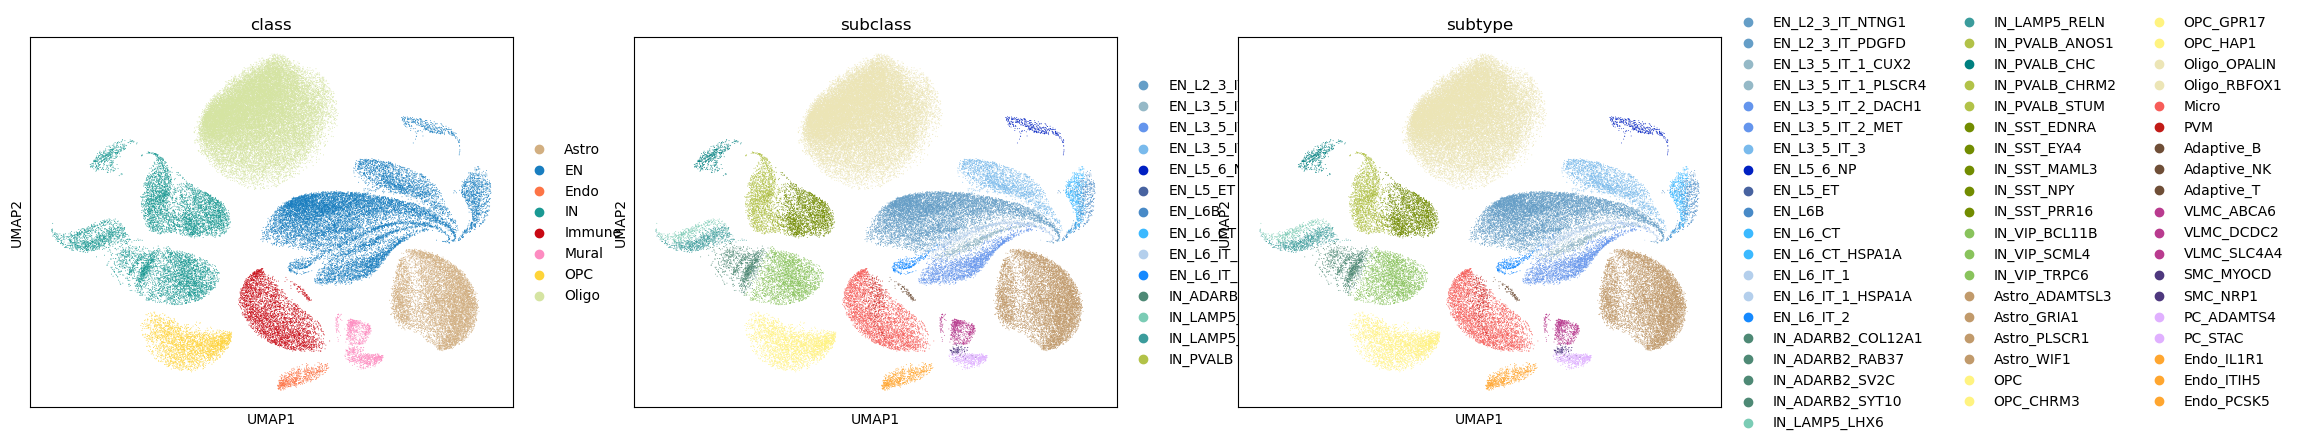

In [27]:
# sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'disease')
sc.pl.umap(adata, color = 'genetic_ancestry')

# sc.pl.umap(adata, color = 'AD_status')
# sc.pl.umap(adata, color = 'sex')
# sc.pl.umap(adata, color = 'subclass')
# sc.pl.umap(adata, color = ['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

In [54]:
del adata.obsm["X_umap"]

### *adata.uns*
Other information:

In [25]:
print("adata.uns.keys :", adata.uns.keys())

adata.uns.keys : dict_keys(['AD_status_colors', 'batch_condition', 'cell_type_colors', 'citation', 'class_colors', 'disease_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'sex_colors', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

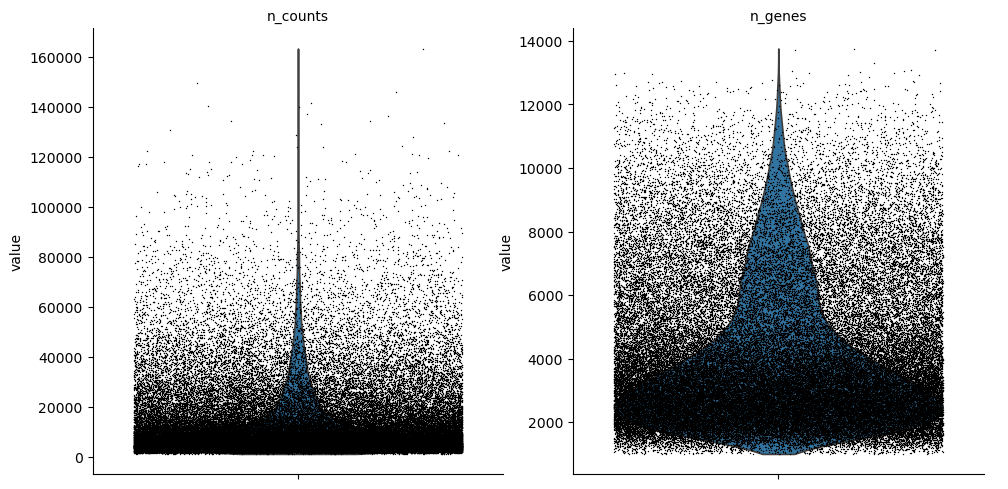

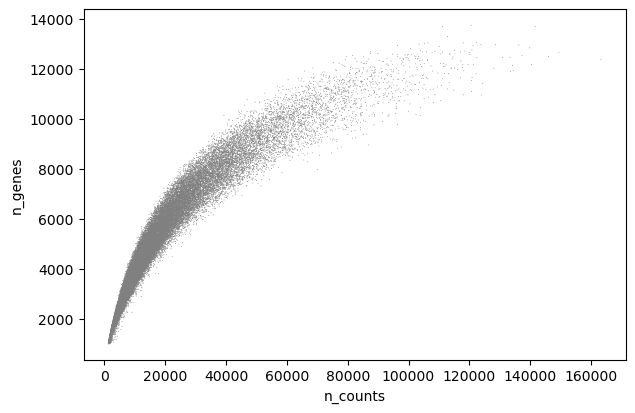

In [5]:
# Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### b - Filtering out low quality cells

In [4]:
# Application of filters
adata = adata[adata.obs['n_genes'] < 12000, :] # cutoff chosen: 12 000 genes

adata = adata[adata.obs['n_counts'] < 80000, :] # cutoff chosen: 80 000 counts

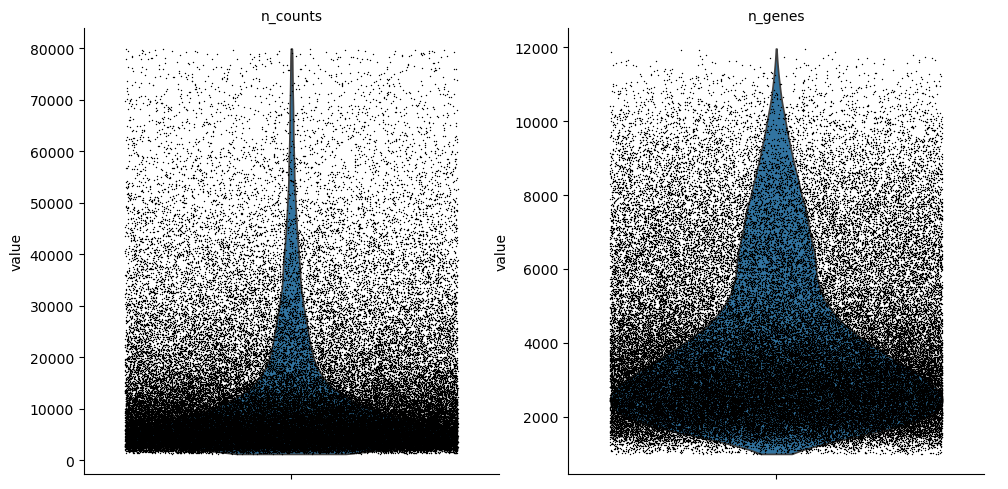

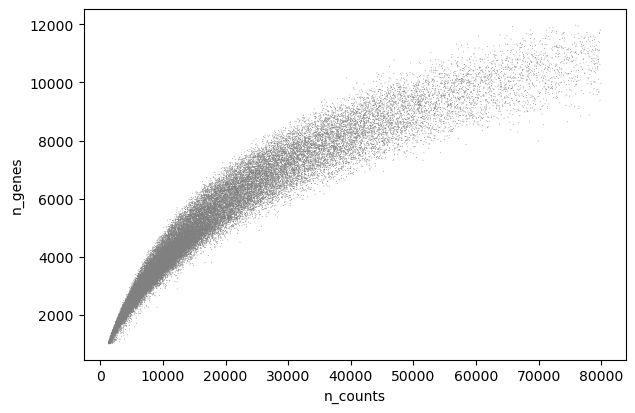

In [7]:
# Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### c - Filtering out mitochondrial genes

In [113]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p = True
)

C:\Users\yarad\AppData\Local\Temp\ipykernel_15920\4025084783.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


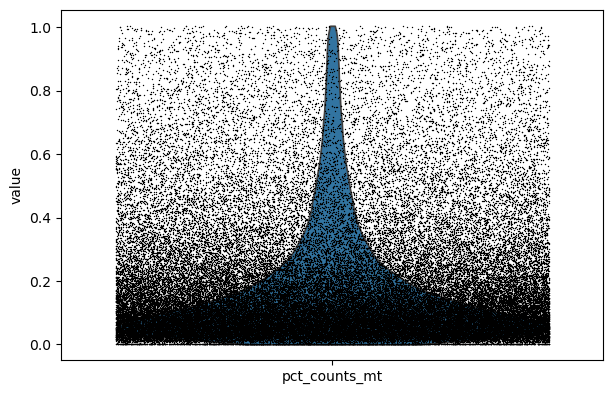

In [9]:
# Visualization of the percentage of mitochondrial genes
sc.pl.violin(
    adata,
    keys = 'pct_counts_mt',
    jitter = 0.4,
    rotation=  0,   
    stripplot = True,
    show = True
)

Here, we note that there were no cells with more than 10% mitochondrial gene expression in the dataset even before we applied our own filter. This means that the dataset did not contain such cells, either because of the nature of the data or because the dataset was already treated and filtered.

### d - Excluding ribosomal and hemoglobin genes
We elected to keep ribosomal genes, which make up 1.5% of genes expressed, and to filter out hemoglobin genes.

In [5]:
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

# Confirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3658450869.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))


proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


### e - IMPORTANT : Apply the filtering on adata_raw

In [11]:
adata_raw = adata_raw[adata.obs_names, adata.var_names].copy() 

## 2. Normalization

The dataset contains raw counts.

In [6]:
# We can see that this is a sparse matrix, without normalized values
adata.X[:5, :10].toarray()

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 1., 1.]], dtype=float32)

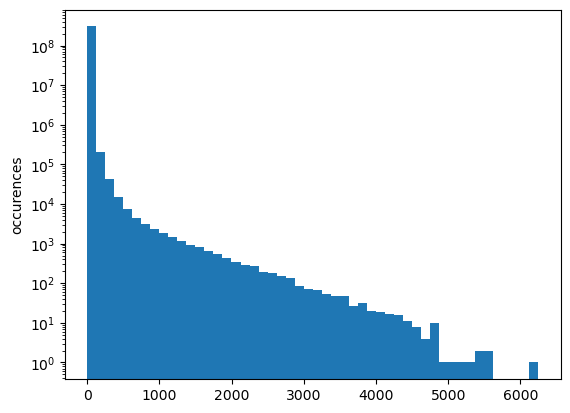

In [7]:
plt.hist(adata.X.data, bins = 50, log = True)
plt.ylabel("occurences")
plt.show()

Normalization using log1p

In [8]:
sc.pp.log1p(adata)

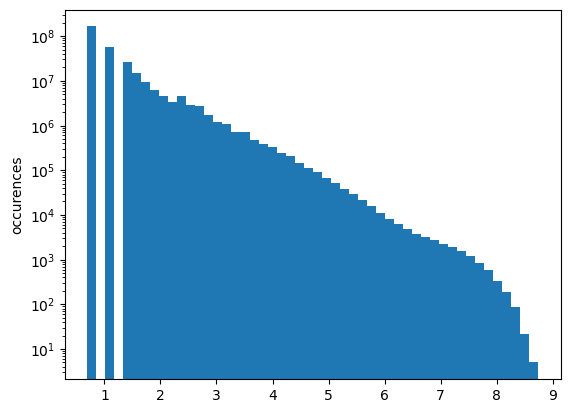

In [15]:
# Verifying that the count fwere normalized
plt.hist(adata.X.data, bins = 50, log = True)
plt.ylabel("occurences")
plt.show()

## 3. Highly Variable Genes (HVGs)

In [9]:
nHVG = 3000 # We are choosing to keep 3000 HVGs

sc.pp.highly_variable_genes(
    adata, 
    flavor = 'cell_ranger',
    n_top_genes = nHVG
)

print("We kept", nHVG, "highly variable genes out of", adata.shape[1], "genes.")

We kept 3000 highly variable genes out of 34167 genes.


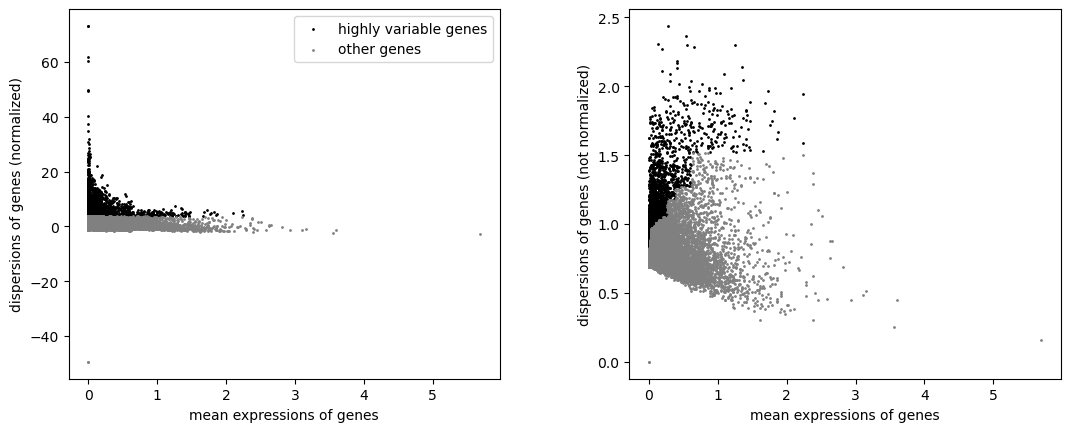

In [17]:
# Plotting the dispersion of genes in the dataset vs their mean expression
sc.pl.highly_variable_genes(adata)

In [18]:
# Verifying the number of HVGs selected
adata.var['highly_variable'].value_counts()

highly_variable
False    31167
True      3000
Name: count, dtype: int64

We now create an AnnData object with the HVGs only that will be used for downstream analyses.

In [117]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [20]:
# Scaling is necessary for the PCA.
sc.pp.scale(adata_hvg, max_value = 10)

/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [21]:
# PCA
sc.tl.pca(adata_hvg)

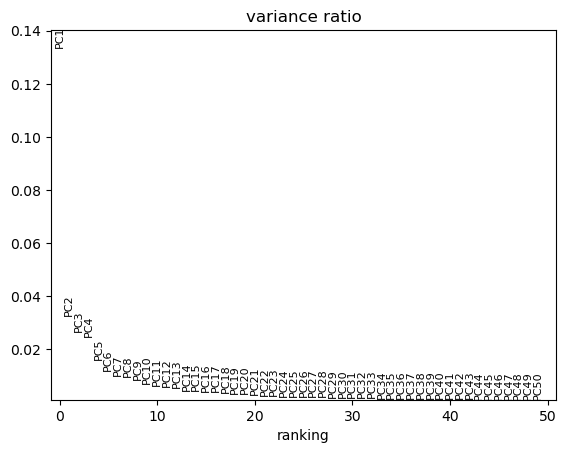

In [22]:
# Visualizing how much variance is represented by each PC
sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50)

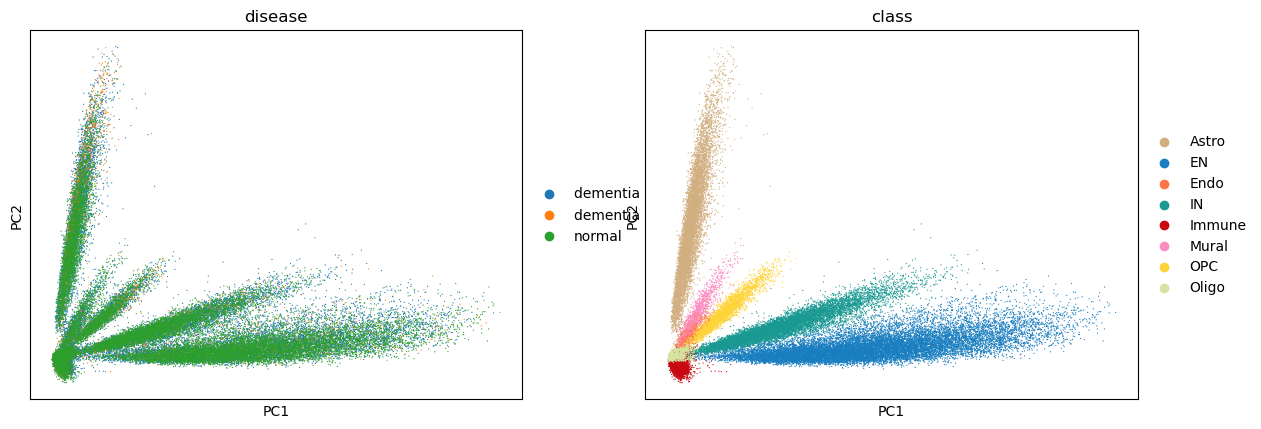

In [23]:
sc.pl.pca(adata_hvg,
    color = ["disease", "class"],
    ncols = 3,
    size = 3)

## 5. Batch effect correction

In [24]:
bbknn.bbknn(adata_hvg, batch_key = 'donor_id')
sc.external.pp.bbknn(adata_hvg, batch_key = "donor_id")

## 6. Clustering

In [25]:
adata_hvg.obs["class"].value_counts()

class
Oligo     29919
EN        17717
IN        10258
Astro      9235
Immune     4270
OPC        3085
Mural      1348
Endo        740
Name: count, dtype: int64

In [26]:
donors_by_class_and_subclass = (adata_hvg.obs.groupby(["class", "subclass"], observed=True)["donor_id"].nunique())

donors_by_class_and_subclass

class   subclass     
Astro   Astro            17
EN      EN_L2_3_IT       17
        EN_L3_5_IT_1     17
        EN_L3_5_IT_2     17
        EN_L3_5_IT_3     17
        EN_L5_6_NP       16
        EN_L5_ET          5
        EN_L6B           16
        EN_L6_CT         16
        EN_L6_IT_1       16
        EN_L6_IT_2       15
Endo    Endo             17
IN      IN_ADARB2        17
        IN_LAMP5_LHX6    17
        IN_LAMP5_RELN    17
        IN_PVALB         17
        IN_PVALB_CHC     17
        IN_SST           17
        IN_VIP           17
Immune  Micro            17
        PVM              16
        Adaptive         12
Mural   VLMC             16
        SMC              13
        PC               17
OPC     OPC              17
Oligo   Oligo            17
Name: donor_id, dtype: int64

### Neighbors

In [27]:
# Number of neighbors
# We chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(
    adata_hvg,
    n_neighbors = 30,
    n_pcs = nPC,
    metric = "euclidean",
    random_state = 42,
)

### Clustering

In [28]:
sc.tl.leiden(adata_hvg, resolution = 0.02)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_81975/1696101154.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, resolution = 0.02)


Number of clusters : 10


### UMAP

In [29]:
sc.tl.umap(
    adata_hvg,
    min_dist = 0.8,        
    random_state = 40,
)

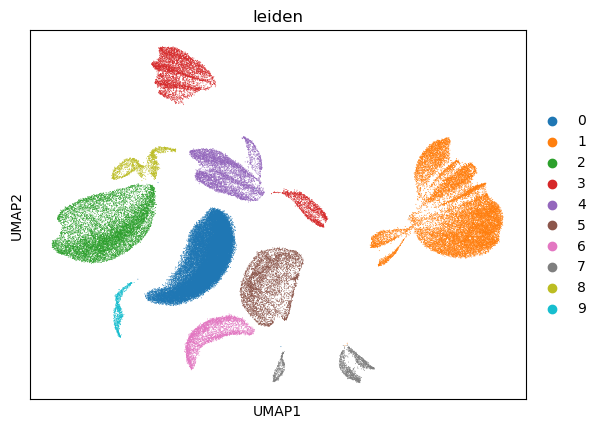

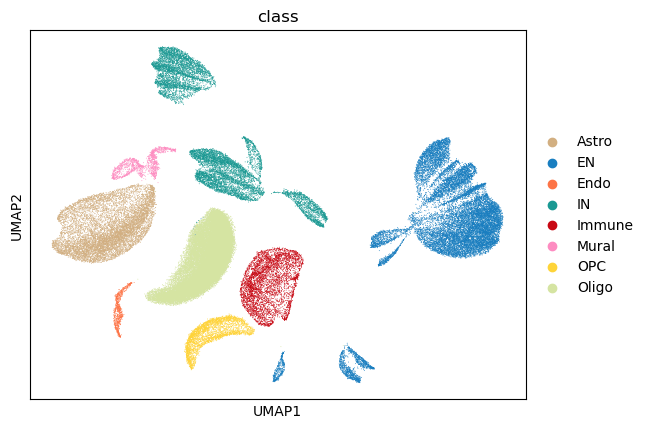

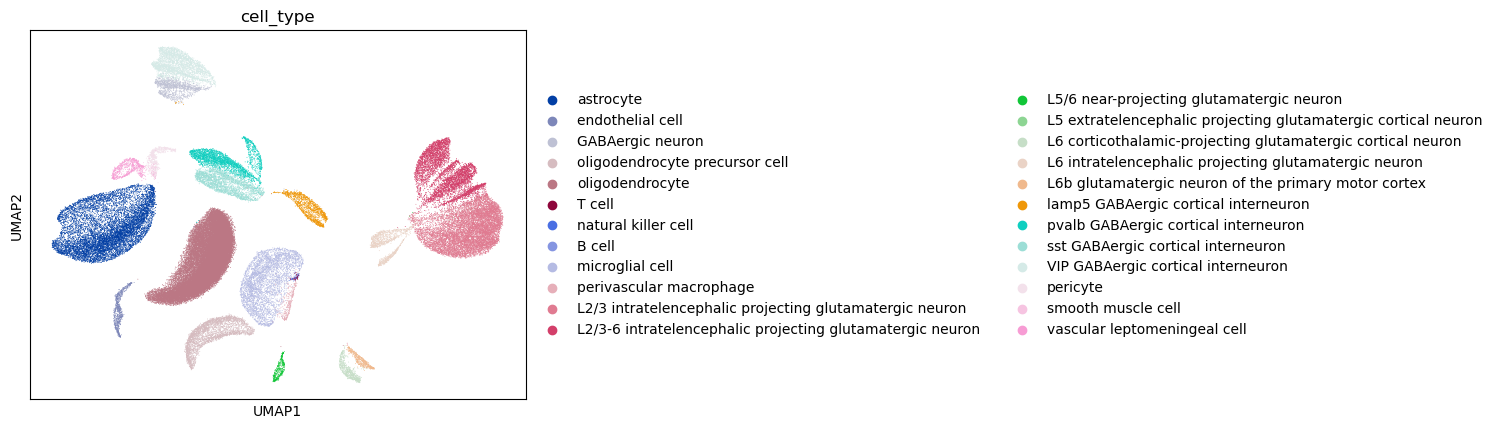

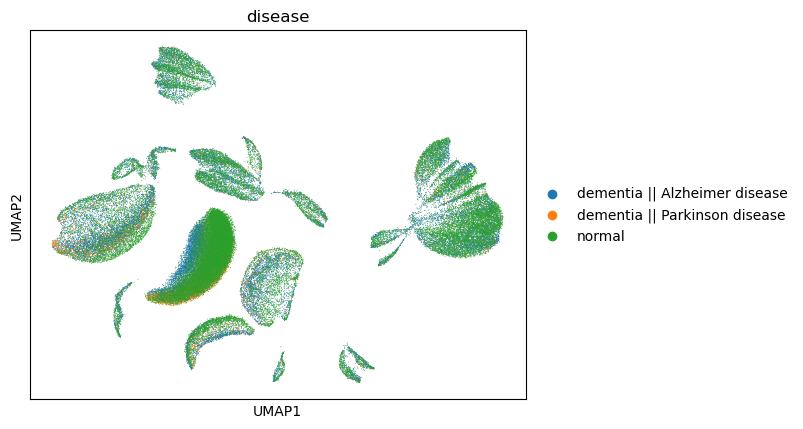

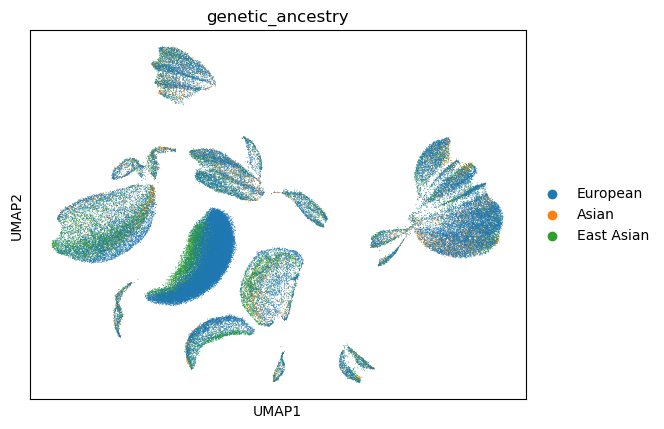

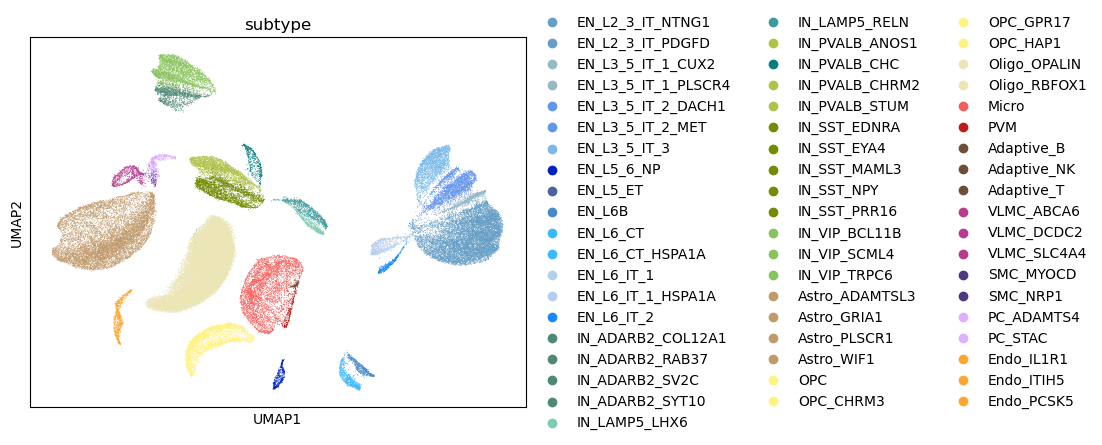

In [30]:

sc.pl.umap(adata_hvg, color = "leiden")

sc.pl.umap(adata_hvg, color = "class")

sc.pl.umap(adata_hvg, color = 'cell_type')

sc.pl.umap(adata_hvg, color = "disease")

sc.pl.umap(adata_hvg, color = "genetic_ancestry")

sc.pl.umap(adata_hvg, color = 'subtype')

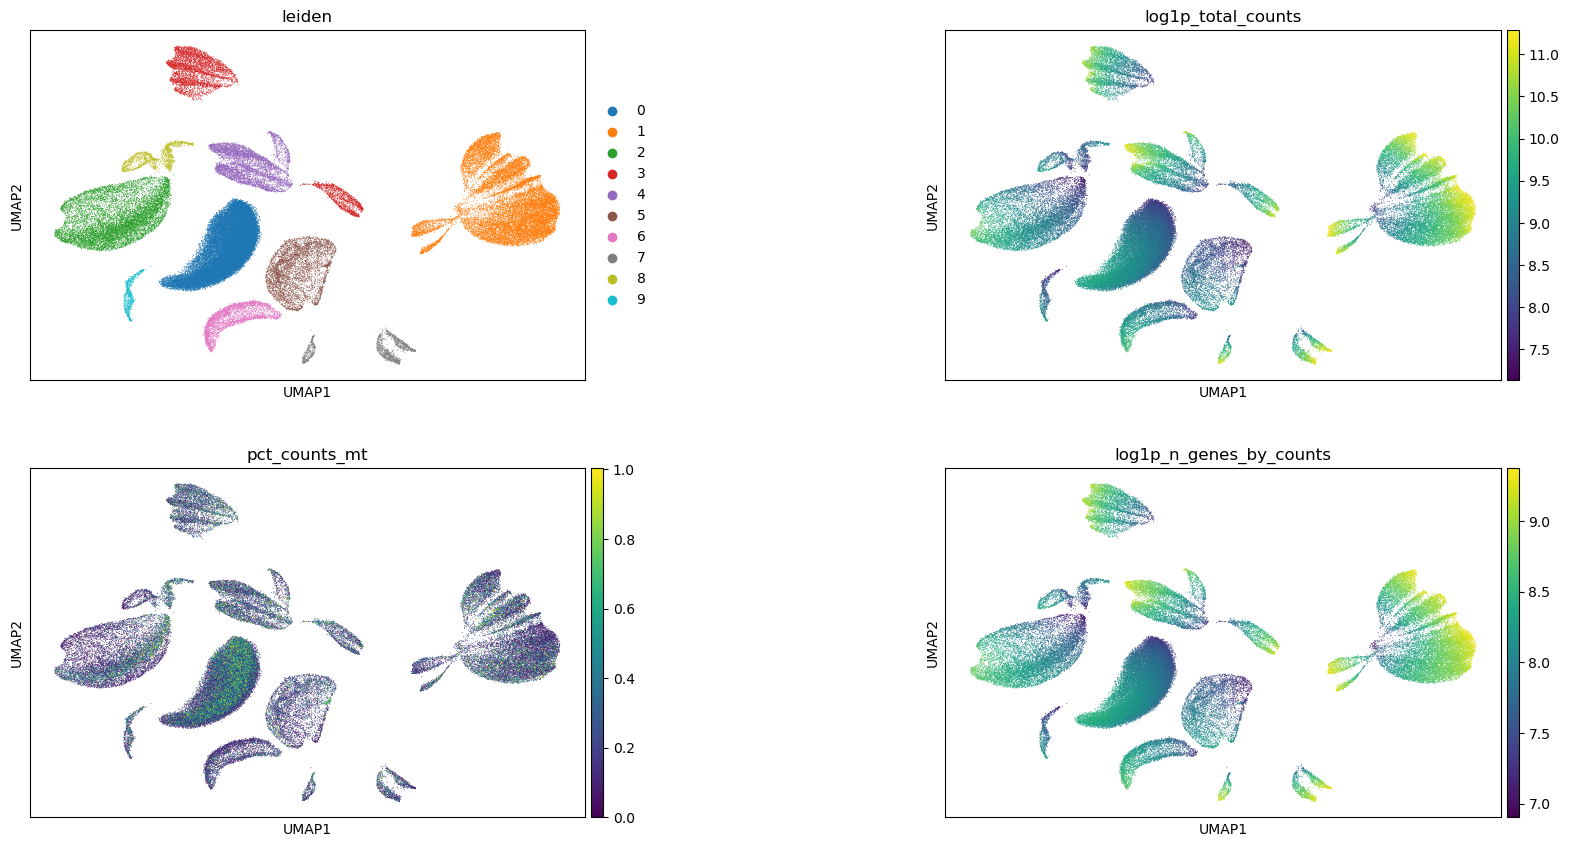

In [ ]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## 7. Manual Annotation

#### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [31]:
# Define marker genes for each cell type (sources referenced in the report)
marker_genes = {
    "Astrocytes" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endothelial cells" : ["ENSG00000184113", "ENSG00000229515"],
    "Immune cells" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligodendrocytes" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695", "ENSG00000172270","ENSG00000204351", "ENSG00000087086",  "ENSG00000115310",  "ENSG00000140076",  "ENSG00000205927", "ENSG00000100146"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "Excitatory Neurons" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "Inhibitory Neurons" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546", 'ENSG00000168826', "ENSG00000074181" ]
    }

marker_genes
 

{'Astrocytes': ['ENSG00000135821',
  'ENSG00000125398',
  'ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000165795',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endothelial cells': ['ENSG00000184113', 'ENSG00000229515'],
 'Immune cells': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578',
  'ENSG00000173372'],
 'Oligodendrocytes': ['ENSG00000197971',
  'ENSG00000204655',
  'ENSG00000123560',
  'ENSG00000168314',
  'ENSG00000105695',
  'ENSG00000172270',
  'ENSG00000204351',
  'ENSG00000087086',
  'ENSG00000115310',
  'ENSG00000140076',
  'ENSG00000205927',
  'ENSG00000100146'],
 'OPC': ['ENSG00000184221',
  'ENSG00000205927',
  'ENSG00000150275',
  'ENSG00000134853'],
 'Excitatory Neurons': ['ENSG00000070808',
  'ENSG00000154146',
  'ENSG00000119042',
  'ENSG00000104888'],
 'Inhibitory Neurons': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': ['ENSG00000113721',
  'ENSG00000175084',
  'ENSG00000173546',
  'ENSG00000168826',
  'ENSG00000074181']}

In [32]:
# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data

{'Astrocytes': ['ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endothelial cells': ['ENSG00000184113'],
 'Immune cells': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligodendrocytes': [],
 'OPC': ['ENSG00000150275', 'ENSG00000134853'],
 'Excitatory Neurons': ['ENSG00000119042'],
 'Inhibitory Neurons': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': ['ENSG00000074181']}

Listing the cell types that we want to show the markers for:

In [33]:
cell_types = ["Astrocytes", "Endothelial cells", "Immune cells", "Oligodendrocytes", "OPC", "Excitatory Neurons", "Inhibitory Neurons", "Mural"]

cell_types

['Astrocytes',
 'Endothelial cells',
 'Immune cells',
 'Oligodendrocytes',
 'OPC',
 'Excitatory Neurons',
 'Inhibitory Neurons',
 'Mural']

Plotting one UMAP per marker for each cell type:

ASTROCYTES:


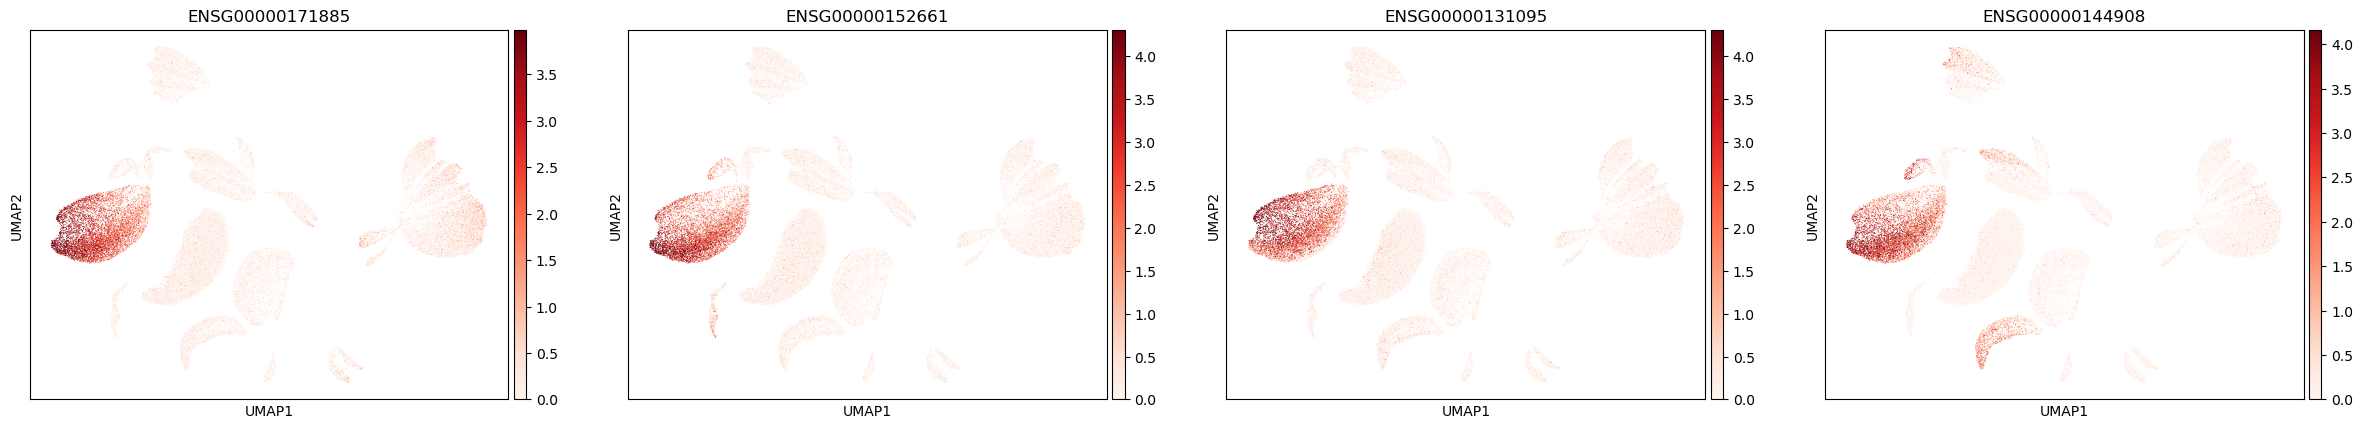





ENDOTHELIAL CELLS:


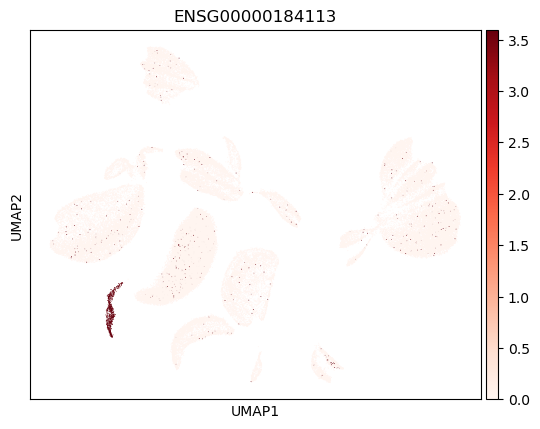





IMMUNE CELLS:


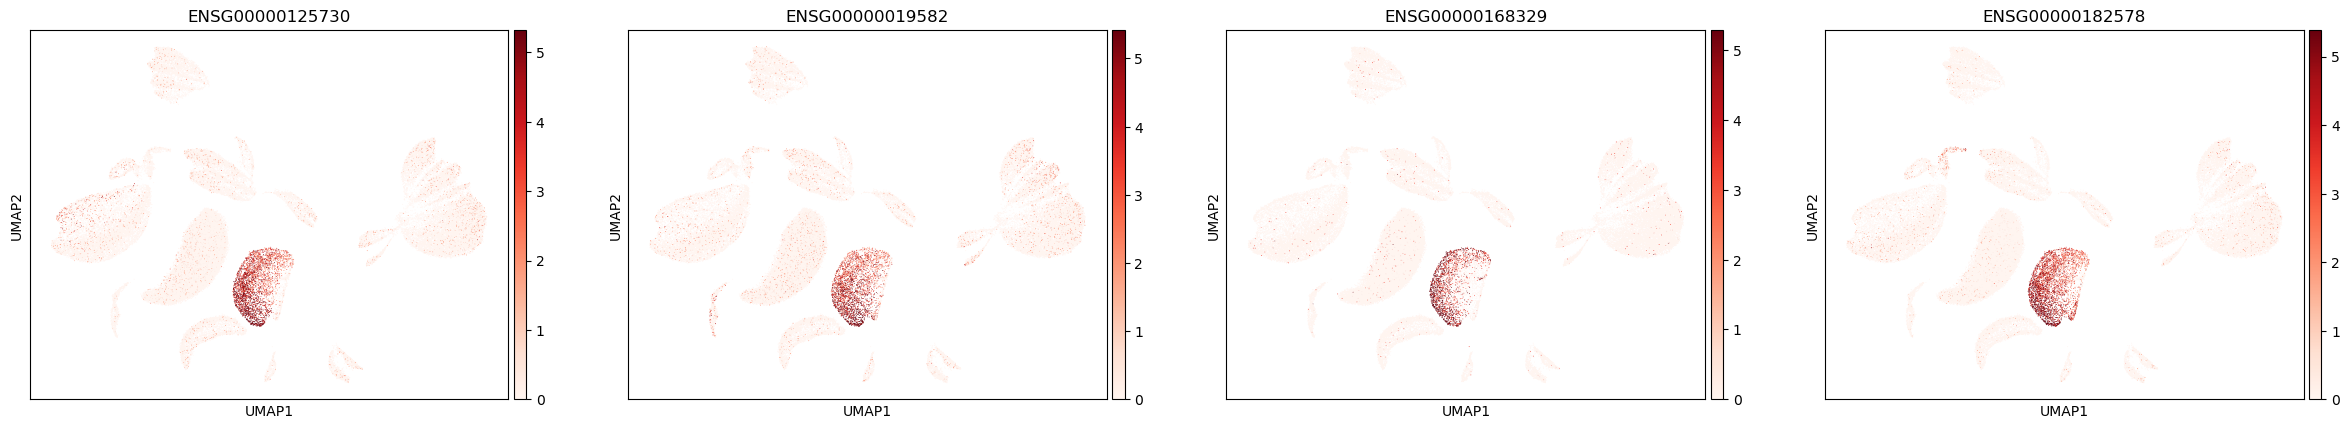





OLIGODENDROCYTES: No marker genes found in data.

OPC:


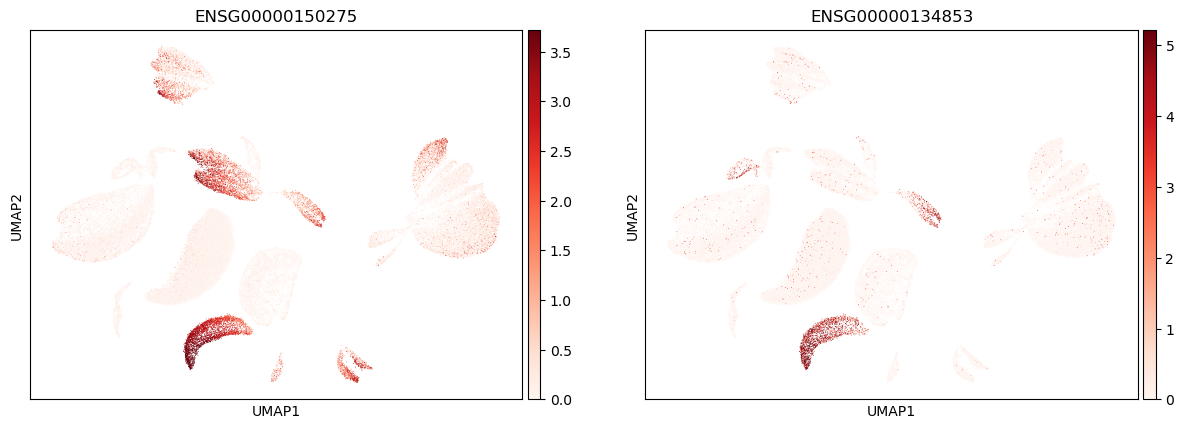





EXCITATORY NEURONS:


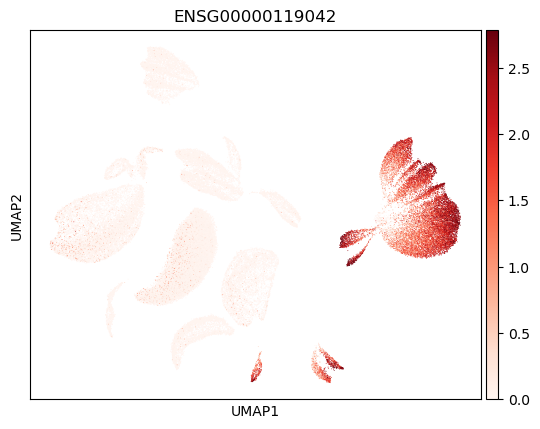





INHIBITORY NEURONS:


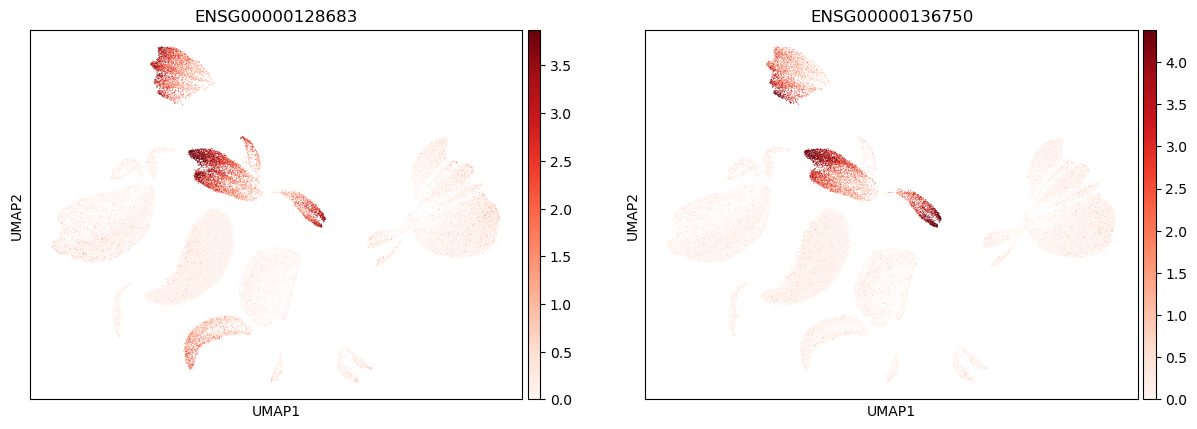





MURAL:


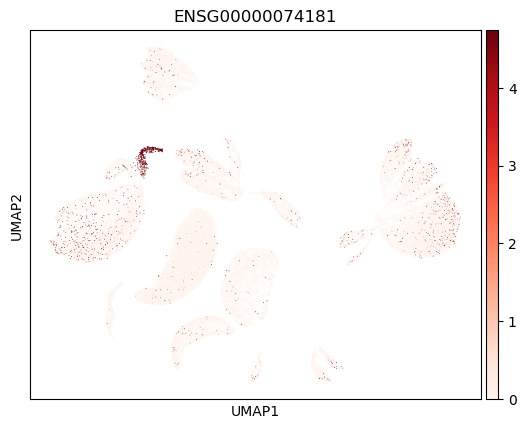

In [34]:
for ct in cell_types:
    markers = marker_genes_in_data[ct]
    if not markers:  # Skip if the list is empty
        print(f"{ct.upper()}: No marker genes found in data.\n")
        continue
    
    print(f"{ct.upper()}:")  
    sc.pl.umap(
        adata_hvg,
        color = markers,
        vmin = 0,
        vmax = "p99",
        sort_order = False,
        cmap = "Reds",
    )
    
    print("\n\n\n") 

Dotplot visualization of marker gene expression per cluster:

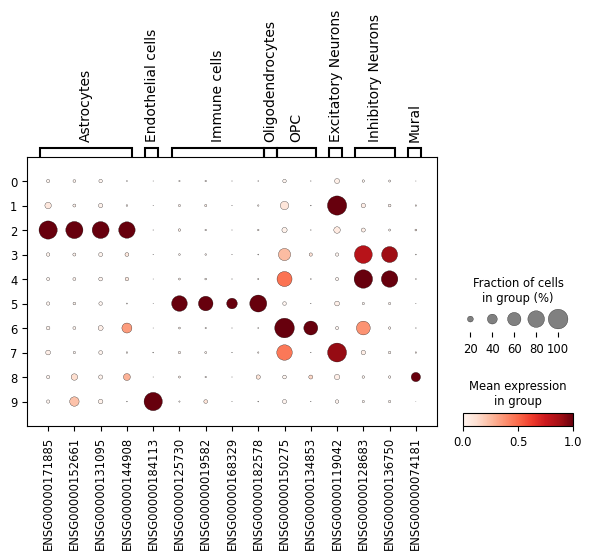

In [35]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [36]:
cl_annotation = {
    "0": "Oligodendrocytes",
    "1": "Excitatory Neurons",
    "2": "Astrocytes", 
    "3": "Inhibitory Neurons",
    "4": "Inhibitory Neurons", 
    "5" : "Immune cells", 
    "6" : "OPC",
    "7" : "Excitatory Neurons",
    "8" : "Mural",
    "9" : "Endothelial cells"
}

To visualize the annotations:

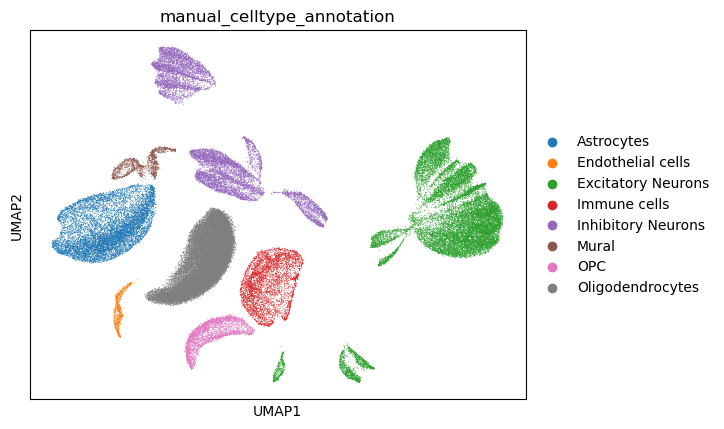

In [37]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others.

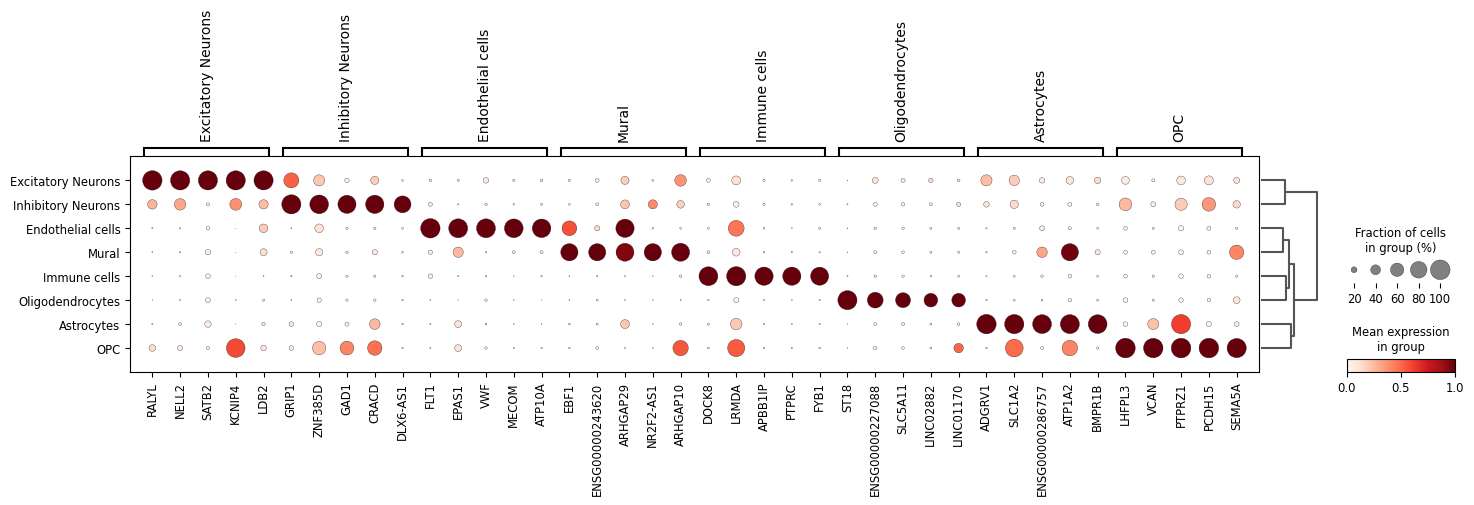

In [ ]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues.

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "manual_celltype_annotation", method = "wilcoxon", key_added = "dea_leiden", var_names="gene_name"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "manual_celltype_annotation", standard_scale = "var", n_genes = 5, key = "dea_leiden" , gene_symbols="gene_name"
)

## 8. Differential Gene Expression

### *Pseudobulk*

In [ ]:
donors_per_disease_raw = (adata_raw.obs.groupby([ "disease"], observed = True)["donor_id"].nunique())
print("The number of donor per disease type :\n", donors_per_disease_raw)

In [ ]:
print("\nThe number of cells per disease type ;")
adata_raw.obs.groupby(["class", "disease"]).size().unstack(fill_value = 0)

Pseudo-bulk matrix (= pb) : 

- lines : cell type per donor 
- columns : mean expression levels

Each donor is considered an indepedant observation. We cannot compare each cell one by one because it's statistically false. Therefore, we do a pseudo-bulk donor x cell type.

Each value corresponds to the mean log-normalized counts for 1 cell type for 1 donor.

In [17]:
adata_raw.obs.keys()

Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')

In [ ]:
# Creation of dataframe for pseudobulk
df = adata_raw.to_df()  
meta = adata_raw.obs[["donor_id", "class", "disease", "sex"]]

df["donor_id"] = meta["donor_id"].values
df["class"] = meta["class"].values
df["disease"] = meta["disease"].values
meta["sex"] = meta["sex"].astype("category")


pb = (df.groupby(["class", "donor_id", "disease"]).sum()) # sum of n_counts per class, donor, and disease
pb = pb[pb.sum(axis = 1) != 0] # deleting empty lines
pb = pb.reset_index()

# Check if the dataframe is of correct shape
if pb.shape[0] == len((adata.obs["donor_id"].cat.categories))* len((adata.obs["class"].cat.categories)) and pb.shape[1] == len(adata_raw.var)+3 :
    print("Dataframe IS OK : no donor or gene were deleted")
else : 
    print("WARNING : wrong number of donors")
    
meta_donor = meta[["donor_id", "sex"]].drop_duplicates()

# Merge donor metadata onto pseudobulk
pb = pb.merge(meta_donor, on = "donor_id", how = "left")

pb

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/2989543718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["sex"] = meta["sex"].astype("category")
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/2989543718.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pb = (df.groupby(["class", "donor_id", "disease"]).sum()) # sum of n_counts per class, donor and disease


Dataframe IS OK : no donor or gene were deleted


class    donor_id                        disease  ENSG00000000003  \
0    Astro    Donor_31  dementia || Alzheimer disease             71.0   
1    Astro   Donor_228  dementia || Alzheimer disease             63.0   
2    Astro   Donor_333  dementia || Alzheimer disease            110.0   
3    Astro   Donor_545  dementia || Parkinson disease             19.0   
4    Astro   Donor_609                         normal             60.0   
..     ...         ...                            ...              ...   
131  Oligo  Donor_1001  dementia || Alzheimer disease              5.0   
132  Oligo  Donor_1007  dementia || Alzheimer disease              0.0   
133  Oligo  Donor_1146                         normal             10.0   
134  Oligo  Donor_1278                         normal              8.0   
135  Oligo  Donor_1467  dementia || Parkinson disease              1.0   

     ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0                7.0            242.0            173.0            139.0   
1                1.0            258.0            197.0            123.0   
2               12.0            140.0            102.0            101.0   
3                3.0            154.0            112.0             69.0   
4                6.0            245.0            156.0            106.0   
..               ...              ...              ...              ...   
131              0.0            293.0            204.0            266.0   
132              0.0             15.0             11.0             15.0   
133              0.0            319.0            213.0            165.0   
134              1.0            808.0            516.0            642.0   
135              0.0             55.0             38.0             35.0   

     ENSG00000000938  ENSG00000000971  ...  ENSG00000288602  ENSG00000288605  \
0                1.0              4.0  ...             98.0             37.0   
1                2.0              1.0  ...            119.0             25.0   
2                1.0              5.0  ...             69.0             13.0   
3                1.0              1.0  ...             91.0             21.0   
4                2.0              8.0  ...            121.0             13.0   
..               ...              ...  ...              ...              ...   
131              6.0             18.0  ...            164.0              3.0   
132              0.0              1.0  ...              4.0              0.0   
133              4.0              7.0  ...             85.0              3.0   
134              5.0             30.0  ...            270.0              0.0   
135              0.0              1.0  ...             25.0              1.0   

     ENSG00000288606  ENSG00000288611  ENSG00000288612  ENSG00000288622  \
0                6.0              0.0             21.0              4.0   
1               10.0              1.0             30.0              3.0   
2                7.0              1.0             18.0              1.0   
3                7.0              1.0             19.0              2.0   
4               12.0              1.0             27.0              0.0   
..               ...              ...              ...              ...   
131             50.0              1.0             38.0              4.0   
132              4.0              0.0              3.0              0.0   
133             31.0              0.0             29.0              3.0   
134             74.0              2.0             69.0              1.0   
135              5.0              0.0              5.0              1.0   

     ENSG00000288637  ENSG00000288642  ENSG00000288643     sex  
0                3.0             15.0             13.0  female  
1                5.0             10.0             17.0    male  
2                3.0             39.0             16.0    male  
3                6.0             13.0             18.0  female  
4                3.0        

In [ ]:
# Saving the pseudobulk matrix into csv
pb.to_csv("pseudobulk_matrix.csv", index = False)
meta.to_csv("meta_matrix.csv", index = False)

### *Differential analysis is done in R*
We performed a differential analysis in R with the DESeq2 and edgeR packages. The code can be found on the "transcriptomics-code" repository. It is named "pseudo_bulk_DE.ipynb". The results are saved in the repository in two folders named "DESeq2_results" and "edgeR_results", which we use for the rest of the analysis. There is no need to re-run the DE unless anything changes in the previous steps or in the parameters used.

### Results

Example of a DE result:

In [36]:
DE_result_ex = pd.read_csv("edgeR_results/edgeR_IN_AD_vs_CTRL.csv", index_col = 0)

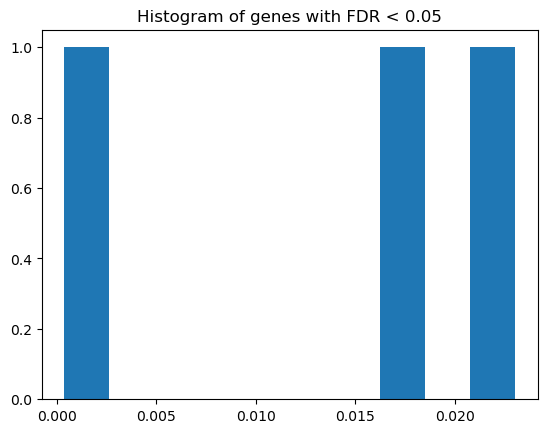

In [ ]:
plt.hist(DE_result_ex[DE_result_ex["FDR"]< 0.05]["FDR"]) 
plt.title("Histogram of genes with FDR < 0.05")

plt.show()

There seems to only be 4 significant genes in this example.

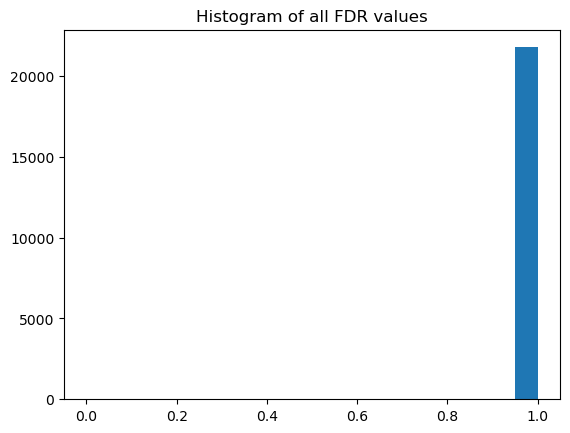

In [44]:
plt.hist(DE_result_ex["FDR"], bins = 20) 
plt.title("Histogram of all FDR values")

plt.show()

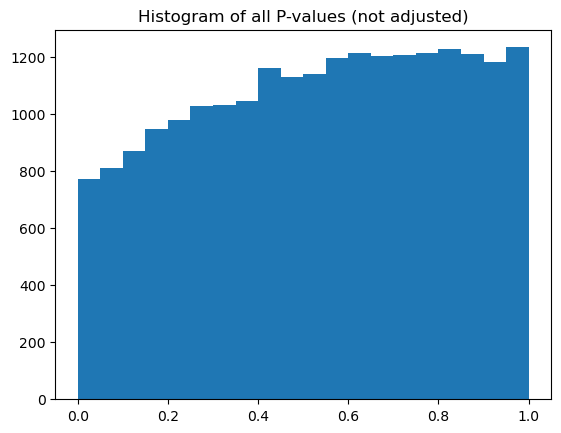

In [ ]:
plt.hist(DE_result_ex["PValue"],bins = 20) 
plt.title("Histogram of all P-values (not adjusted)")

plt.show()

In [ ]:
DE_result_ex[DE_result_ex["FDR"] < 0.05] # every gene where padj < 0.05

logFC    logCPM          F        PValue       FDR
ENSG00000026508 -2.149423  1.817574  68.787008  1.711512e-08  0.000373
ENSG00000259520 -2.356264  2.874376  40.961758  1.688644e-06  0.018421
ENSG00000225647  2.009270  0.180834  35.292211  3.166891e-06  0.023032

There are only 3 genes in this example with padj < 0.05.

#### **Volcano Plot Representation of Results**

In [10]:
# Loading the results:
files = glob.glob("edgeR_results/*.csv")

files

['edgeR_results\\edgeR_Astro_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Astro_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Astro_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Endo_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_PD.csv',
 'edgeR_results\\edgeR_EN_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Immune_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_PD.csv',
 'edgeR_results\\edgeR_IN_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Mural_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Oligo_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Oligo_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Oligo_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_OPC_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR

In [78]:
# Defining the needed function
def volcano_plot(df, title, outfile = None, pval_col = "PValue", fc_col = "logFC", p_cut = 0.05, fc_cut = 1):
    """
    df: DataFrame containing edgeR results
    title: Title of the plot
    outfile: Where to save (PNG). If None → only show.
    pval_col: "PValue" or "FDR"
    fc_col: usually "logFC"
    p_cut: significance threshold
    fc_cut: log2 fold change threshold
    """

    # Compute −log10(p)
    df["neglog10p"] = -np.log10(df[pval_col])

    # Label significance
    df["sig"] = "Not Sig"
    df.loc[(df[pval_col] < p_cut) & (df[fc_col] > fc_cut), "sig"] = "Up"
    df.loc[(df[pval_col] < p_cut) & (df[fc_col] < -fc_cut), "sig"] = "Down"

    plt.figure(figsize=(9, 7))
    sns.scatterplot(
        data = df,
        x = fc_col, 
        y = "neglog10p",
        hue = "sig",
        palette = {"Not Sig": "grey", "Up": "red", "Down": "blue"},
        alpha = 0.7,
        s = 12
    )

    # Threshold lines
    plt.axhline(-np.log10(p_cut), color = "black", linestyle = "--", linewidth = 1)
    plt.axvline(fc_cut, color = "black", linestyle = "--", linewidth = 1)
    plt.axvline(-fc_cut, color = "black", linestyle = "--", linewidth = 1)

    plt.title(title, fontsize = 16)
    plt.xlabel("log2 Fold Change")
    plt.ylabel("-log10(p-value)")
    plt.legend(title = "Significance")
    plt.tight_layout()

    # Save the graphs
    plt.savefig(outfile, dpi = 300, bbox_inches = "tight")
    print(f"Saved volcano → {outfile}")
    plt.close()



In [79]:
# Running the function for each DEG result file - pvalue
outdir = "DGE_volcano_plots_pval"
os.makedirs(outdir, exist_ok = True)

for file in files:
    df = pd.read_csv(file)
    name = os.path.splitext(os.path.basename(file))[0]

    volcano_plot(
        df,
        title = name,
        outfile = os.path.join(outdir, f"{name}_volcano.png"),
        pval_col = "PValue",
        fc_col = "logFC",
        p_cut = 0.05,
        fc_cut = 1
    )

Saved volcano → DGE_volcano_plots_pval\edgeR_Astro_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Astro_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Astro_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Endo_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Endo_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Endo_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_EN_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_EN_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_EN_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Immune_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Immune_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_Immune_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_IN_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_pval\edgeR_IN_AD_vs_PD_v

In [82]:
# Running the function for each DEG result file - FDR
outdir = "DGE_volcano_plots_FDR"
os.makedirs(outdir, exist_ok = True)

for file in files:
    df = pd.read_csv(file)
    name = os.path.splitext(os.path.basename(file))[0]

    volcano_plot(
        df,
        title = name,
        outfile = os.path.join(outdir, f"{name}_volcano.png"),
        pval_col = "FDR",
        fc_col = "logFC",
        p_cut = 0.25,
        fc_cut = 1
    )

Saved volcano → DGE_volcano_plots_FDR\edgeR_Astro_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Astro_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Astro_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Endo_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Endo_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Endo_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_EN_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_EN_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_EN_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Immune_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Immune_AD_vs_PD_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_Immune_PD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_IN_AD_vs_CTRL_volcano.png
Saved volcano → DGE_volcano_plots_FDR\edgeR_IN_AD_vs_PD_volcano.png
Sav

#### **Expression Of Top Genes Per Condition:** Verifying Directionality

Some of the downstream results imply an issue with DE directionality. Therefore, we elected to represent the gene expression of the top 10 genes per DEG result in all 3 conditions (AD, PD, and CTRL) to verify directionality. **I still need to test this code YD 12/8 & get the graphs**

In [125]:
adata.obs.keys()

Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
   

In [13]:
def extract_long_df(df_path, adata, condition_col):

    df = pd.read_csv(df_path)
    df = df.dropna(subset=["gene_ensembl", "logFC"])

    # Select top 10 by |logFC|
    top_genes = (
        df.reindex(df["logFC"].abs().sort_values(ascending=False).index)["gene_ensembl"]
        .head(10)
        .tolist()
    )

    # Keep only genes that are actually in the AnnData object
    valid_genes = [g for g in top_genes if g in adata.var_names]

    if len(valid_genes) == 0:
        print(f"⚠️ No valid genes found in AnnData for: {df_path}")
        return None, None

    # Extract raw expression
    expr = adata[:, valid_genes].to_df()

    # Add metadata
    expr[condition_col] = adata.obs[condition_col].values

    # Log-transform the expression (avoids problems with zeros)
    expr[valid_genes] = np.log1p(expr[valid_genes])

    # Wide → long
    long_df = expr.melt(id_vars=[condition_col],
                        var_name="gene",
                        value_name="expression")

    return long_df, valid_genes

For boxplot representation:

In [ ]:
def plot_top10_deg_boxplots_log(df_path, adata, condition_col, outdir="DEG_top_genes_boxplots"):

    os.makedirs(outdir, exist_ok=True)

    long_df, valid_genes = extract_long_df(df_path, adata, condition_col)
    if long_df is None:
        return

    plt.figure(figsize=(14, 6))
    sns.boxplot(data=long_df, x="gene", y="expression", hue=condition_col)

    plt.xticks(rotation=45)
    plt.ylabel("log1p(expression)")
    plt.title(f"Top 10 DEG expression (log scale) — {os.path.basename(df_path)}")
    plt.tight_layout()

    outfile = os.path.join(
        outdir, os.path.basename(df_path).replace(".csv", "_boxplot_log.png")
    )
    plt.savefig(outfile, dpi = 300)
    plt.close()

    print(f"Saved → {outfile}")

For violin plot representation:

In [19]:
def plot_top10_deg_violins_log(df_path, adata, condition_col, outdir="DEG_top_genes_violins"):

    os.makedirs(outdir, exist_ok=True)

    long_df, valid_genes = extract_long_df(df_path, adata, condition_col)
    if long_df is None:
        return

    plt.figure(figsize=(14, 6))
    sns.violinplot(
        data=long_df,
        x="gene",
        y="expression",
        hue=condition_col,
        cut=0,
        scale="width"
    )

    plt.xticks(rotation=45)
    plt.ylabel("log1p(expression)")
    plt.title(f"Top 10 DEG expression (log scale) — {os.path.basename(df_path)}")
    plt.tight_layout()

    outfile = os.path.join(
        outdir, os.path.basename(df_path).replace(".csv", "_violin_log.png")
    )
    plt.savefig(outfile, dpi=300)
    plt.close()

    print(f"Saved → {outfile}")

In [20]:
for f in files:
    plot_top10_deg_boxplots_log(f, adata, "disease")
    plot_top10_deg_violins_log(f, adata, "disease")

Saved → DEG_top_genes_boxplots\edgeR_Astro_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Astro_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Astro_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Astro_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Astro_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Astro_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Endo_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Endo_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Endo_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Endo_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Endo_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Endo_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_EN_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_EN_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_EN_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_EN_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_EN_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_EN_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Immune_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Immune_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Immune_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Immune_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Immune_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Immune_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_IN_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_IN_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_IN_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_IN_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_IN_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_IN_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Mural_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Mural_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Mural_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Mural_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Mural_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Mural_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Oligo_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Oligo_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Oligo_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Oligo_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_Oligo_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_Oligo_PD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_OPC_AD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_OPC_AD_vs_CTRL_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_OPC_AD_vs_PD_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_OPC_AD_vs_PD_violin_log.png
Saved → DEG_top_genes_boxplots\edgeR_OPC_PD_vs_CTRL_boxplot_log.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\3073754116.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved → DEG_top_genes_violins\edgeR_OPC_PD_vs_CTRL_violin_log.png


# **GSEA**

fonction pour ajouter la colonne de gène et l'ajouter à un fichier qui vient d'être load + rank les gènes avec un -logFC jsp quoi. un ranked signed

In [24]:
# Compter cellules par (donor, disease, class)
df = (
    adata.obs
    .groupby(["donor_id", "disease", "class"])
    .size()
    .reset_index(name="n_cells")
)

df = df[df["n_cells"]!=0]

df["disease"] = df["disease"].replace({
    "dementia || Alzheimer disease": "Alzheimer disease",
    "dementia || Parkinson disease": "Parkinson disease",
    "normal": "Control"
})

df

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/3981658980.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["donor_id", "disease", "class"])
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/3981658980.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["disease"] = df["disease"].replace({


donor_id            disease   class  n_cells
0      Donor_31  Alzheimer disease   Astro      430
1      Donor_31  Alzheimer disease      EN      760
2      Donor_31  Alzheimer disease    Endo        1
3      Donor_31  Alzheimer disease      IN      325
4      Donor_31  Alzheimer disease  Immune      345
..          ...                ...     ...      ...
395  Donor_1467  Parkinson disease      IN       49
396  Donor_1467  Parkinson disease  Immune       53
397  Donor_1467  Parkinson disease   Mural       16
398  Donor_1467  Parkinson disease     OPC       97
399  Donor_1467  Parkinson disease   Oligo      120

[136 rows x 4 columns]

In [ ]:
tot = adata.obs.groupby(["donor_id"]).size().reset_index(name = "total")

# Merge
df = df.merge(tot, on="donor_id")
df["prop"] = df["n_cells"] / df["total"]

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/1786909637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot = adata.obs.groupby(["donor_id"]).size().reset_index(name="total")


In [26]:
list(df["class"].unique())

['Astro', 'EN', 'Endo', 'IN', 'Immune', 'Mural', 'OPC', 'Oligo']

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/1654134050.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/1654134050.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/1654134050.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_68911/1654134050.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

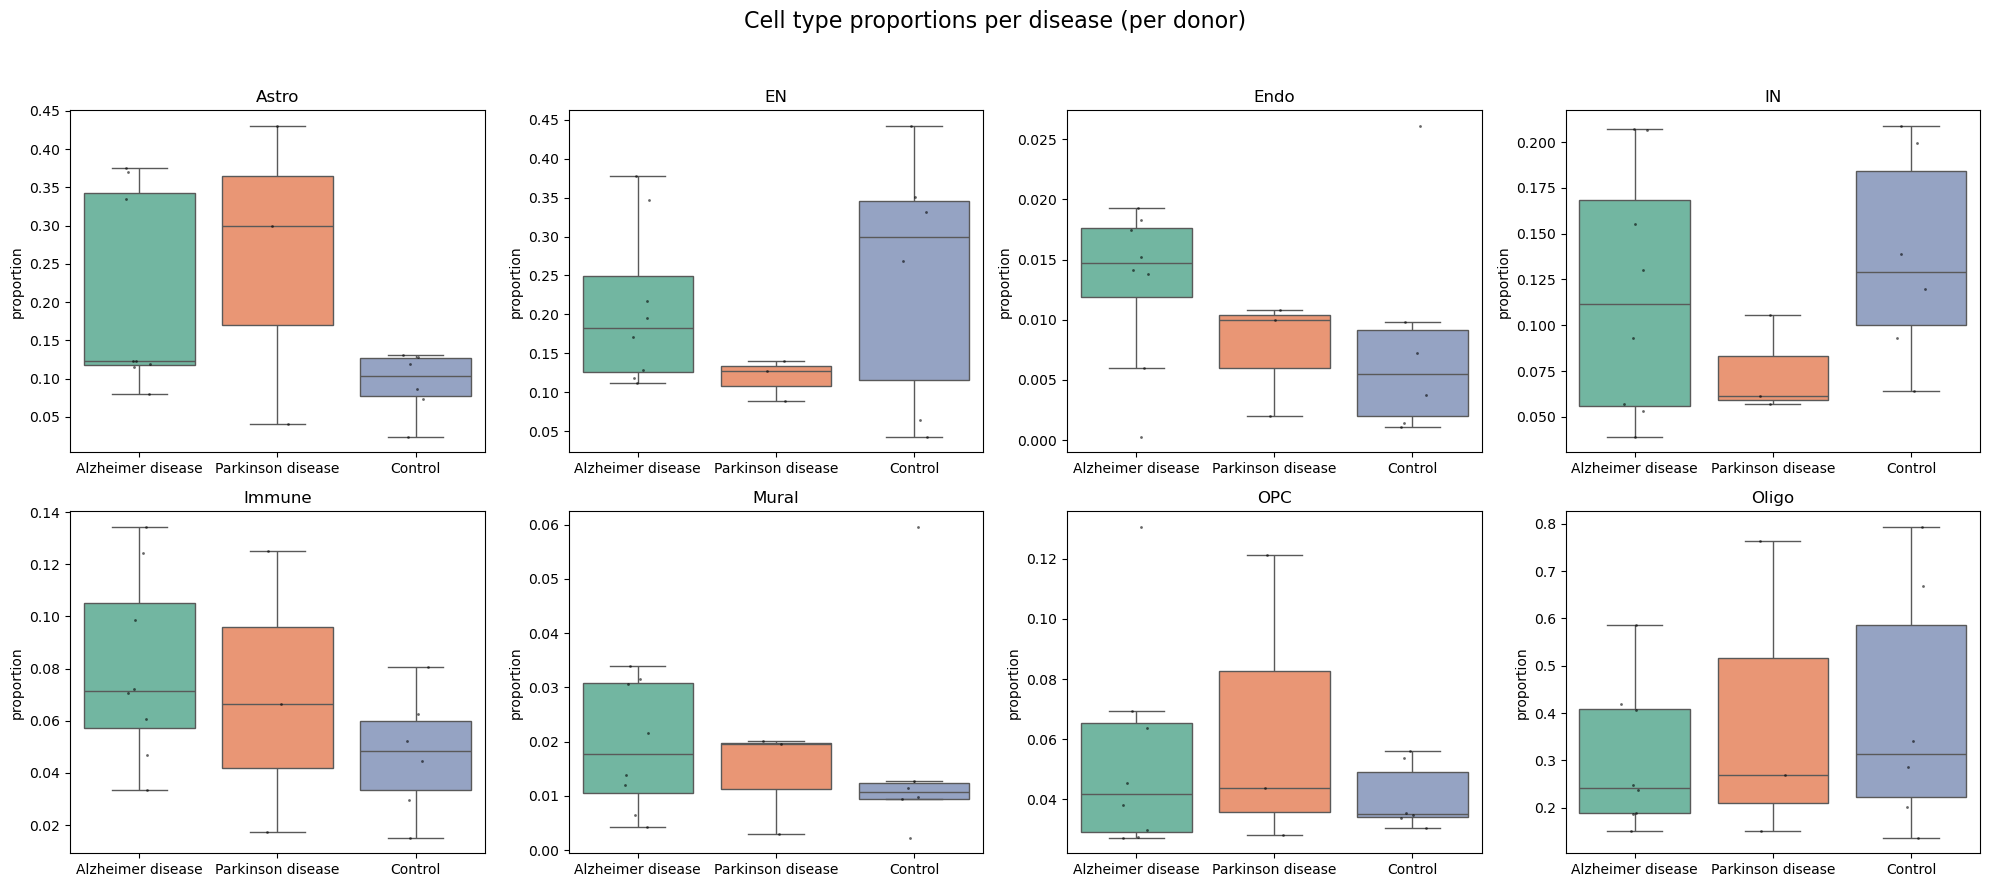

In [27]:
classes = df["class"].unique()
n = len(classes)

# nombre de lignes et colonnes dans la grille des panels
ncols = 4
nrows = int(np.ceil(n / ncols))

plt.figure(figsize = (20, 9))

for i, celltype in enumerate(classes, 1):
    sub = df[df["class"] == celltype]

    ax = plt.subplot(nrows, ncols, i)

    sns.boxplot(
        data = sub,
        x = "disease",
        y = "prop",
        palette = "Set2",
        showfliers = False,
        ax = ax
    )

    sns.stripplot(
        data = sub,
        x = "disease",
        y = "prop",
        color = "black",
        size = 2,
        jitter = True,
        alpha = 0.6,
        ax = ax
    )

    ax.set_title(celltype)
    ax.set_xlabel("")
    ax.set_ylabel("proportion")

plt.suptitle("Cell type proportions per disease (per donor)", fontsize = 16)
plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()

pvalues non significatives (je les ai calculées). Apparemment c'est normal et on fait jamais de tests stats sur des proportions, c'est vu qu'on a peu de donneur par condition, on voit pas grand chose. 

fin elodie

We first need to match the gene IDs in our list to those in the gene set libraries that will be used later. No need to rerun the mygene conversions unless there's any changes in the previous steps as it is time-consuming. It's already been done and saved in the repo!

In [ ]:
# # This takes a long time to run - don't run it again if you don't need to, I already saved the files and they're in the repo!

# mg = mygene.MyGeneInfo()

# for file in files:
#     print("Reading:", file)
#     df = pd.read_csv(file)

#     # Detect the column with the gene Ensembl IDs
#     ens_col = None
#     for col in df.columns:
#         # Check if the first non-null value looks like an Ensembl ID
#         val = str(df[col].dropna().iloc[0])
#         if val.startswith("ENSG"):
#             ens_col = col
#             break

#     # Rename column to gene_ensembl
#     df.rename(columns = {ens_col: "gene_ensembl"}, inplace = True)

#     # Remove version numbers if present
#     df["gene_ensembl"] = df["gene_ensembl"].astype(str).str.split(".").str[0]

#     # 3. Convert Ensembl IDs to gene symbols
#     print("   Querying MyGene.info …")

#     results = mg.querymany(
#         df["gene_ensembl"].tolist(),
#         scopes = "ensembl.gene",
#         fields = "symbol",
#         species = "human",
#         as_dataframe = False
#     )

#     # Build mapping dictionary
#     mapping = {item["query"]: item.get("symbol", None) for item in results}

#     # Map into DF
#     df["gene_symbol"] = df["gene_ensembl"].map(mapping)

#     # Uppercase symbols
#     df["gene_symbol"] = df["gene_symbol"].astype(str).str.upper()

#     # Save back into the same file
#     df.to_csv(file, index=False)
#     print(f"Updated file saved: {file}\n")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Reading: edgeR_results/edgeR_Mural_AD_vs_PD.csv
   Querying MyGene.info …


5 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000228566', 2), ('ENSG00000278932', 3), ('ENSG00000243620', 2), ('E
1 input query terms found no hit:	['ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Mural_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Immune_AD_vs_CTRL.csv
   Querying MyGene.info …


8 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000276241', 4), ('ENSG00000175711', 2), ('ENSG00000234162', 2), ('E
2 input query terms found no hit:	['ENSG00000266957', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Immune_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Endo_PD_vs_CTRL.csv
   Querying MyGene.info …


2 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000243620', 2)]
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Endo_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_EN_AD_vs_PD.csv
   Querying MyGene.info …


19 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000261600', 2), ('ENSG00000287478', 2), ('ENSG00000234162', 2), ('E
5 input query terms found no hit:	['ENSG00000266957', 'ENSG00000250410', 'ENSG00000189144', 'ENSG00000267058', 'ENSG00000280987']


Updated file saved: edgeR_results/edgeR_EN_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Immune_AD_vs_PD.csv


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


   Querying MyGene.info …


8 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000276241', 4), ('ENSG00000257545', 2), ('ENSG00000234162', 2), ('E
2 input query terms found no hit:	['ENSG00000189144', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Immune_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Astro_PD_vs_CTRL.csv
   Querying MyGene.info …


13 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000276241', 4), ('ENSG00000257545', 2), ('ENSG00000234162', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000280987', 'ENSG00000266957', 'ENSG00000250410', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Astro_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Oligo_AD_vs_CTRL.csv
   Querying MyGene.info …


14 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000287326', 2), ('ENSG00000257545', 2), ('ENSG00000243620', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000280987', 'ENSG00000250410', 'ENSG00000266957', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Oligo_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_IN_AD_vs_CTRL.csv
   Querying MyGene.info …


18 input query terms found dup hits:	[('ENSG00000261600', 2), ('ENSG00000228566', 2), ('ENSG00000215156', 2), ('ENSG00000287326', 2), ('E
5 input query terms found no hit:	['ENSG00000250410', 'ENSG00000266957', 'ENSG00000280987', 'ENSG00000189144', 'ENSG00000267058']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_IN_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_OPC_PD_vs_CTRL.csv
   Querying MyGene.info …


10 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000228566', 2), ('ENSG00000257545', 2), ('ENSG00000250406', 2), ('E
4 input query terms found no hit:	['ENSG00000266957', 'ENSG00000280987', 'ENSG00000250410', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_OPC_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Mural_PD_vs_CTRL.csv
   Querying MyGene.info …


5 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000228566', 2), ('ENSG00000243620', 2), ('ENSG00000278932', 3), ('E
1 input query terms found no hit:	['ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Mural_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_EN_PD_vs_CTRL.csv
   Querying MyGene.info …


19 input query terms found dup hits:	[('ENSG00000261600', 2), ('ENSG00000234162', 2), ('ENSG00000250406', 2), ('ENSG00000215156', 2), ('E
5 input query terms found no hit:	['ENSG00000266957', 'ENSG00000189144', 'ENSG00000267058', 'ENSG00000280987', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_EN_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_OPC_AD_vs_PD.csv
   Querying MyGene.info …


10 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000227110', 2), ('ENSG00000257545', 2), ('ENSG00000228566', 2), ('E
4 input query terms found no hit:	['ENSG00000250410', 'ENSG00000266957', 'ENSG00000280987', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_OPC_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Immune_PD_vs_CTRL.csv
   Querying MyGene.info …


8 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000257545', 2), ('ENSG00000276241', 4), ('ENSG00000234352', 2), ('E
2 input query terms found no hit:	['ENSG00000189144', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Immune_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Astro_AD_vs_PD.csv
   Querying MyGene.info …


13 input query terms found dup hits:	[('ENSG00000276241', 4), ('ENSG00000243620', 2), ('ENSG00000257545', 2), ('ENSG00000234352', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000250410', 'ENSG00000189144', 'ENSG00000266957', 'ENSG00000280987']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Astro_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Oligo_PD_vs_CTRL.csv
   Querying MyGene.info …


14 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000228044', 2), ('ENSG00000175711', 2), ('ENSG00000250406', 2), ('E
5 input query terms found no hit:	['ENSG00000189144', 'ENSG00000280987', 'ENSG00000250410', 'ENSG00000267058', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Oligo_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Oligo_AD_vs_PD.csv
   Querying MyGene.info …


14 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000175711', 2), ('ENSG00000228044', 2), ('ENSG00000226519', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000250410', 'ENSG00000280987', 'ENSG00000189144', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Oligo_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Endo_AD_vs_PD.csv
   Querying MyGene.info …


2 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000243620', 2)]
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Endo_AD_vs_PD.csv

Reading: edgeR_results/edgeR_IN_PD_vs_CTRL.csv
   Querying MyGene.info …


18 input query terms found dup hits:	[('ENSG00000261600', 2), ('ENSG00000227110', 2), ('ENSG00000250406', 2), ('ENSG00000234352', 2), ('E
5 input query terms found no hit:	['ENSG00000266957', 'ENSG00000189144', 'ENSG00000280987', 'ENSG00000267058', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_IN_PD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Mural_AD_vs_CTRL.csv
   Querying MyGene.info …


5 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000278932', 3), ('ENSG00000243620', 2), ('ENSG00000227110', 2), ('E
1 input query terms found no hit:	['ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Mural_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_OPC_AD_vs_CTRL.csv
   Querying MyGene.info …


10 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000228566', 2), ('ENSG00000257545', 2), ('ENSG00000234162', 2), ('E
4 input query terms found no hit:	['ENSG00000266957', 'ENSG00000280987', 'ENSG00000189144', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_OPC_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_EN_AD_vs_CTRL.csv
   Querying MyGene.info …


19 input query terms found dup hits:	[('ENSG00000287478', 2), ('ENSG00000175711', 2), ('ENSG00000285761', 3), ('ENSG00000226506', 2), ('E
5 input query terms found no hit:	['ENSG00000189144', 'ENSG00000267058', 'ENSG00000280987', 'ENSG00000250410', 'ENSG00000266957']


Updated file saved: edgeR_results/edgeR_EN_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_IN_AD_vs_PD.csv


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


   Querying MyGene.info …


18 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000261600', 2), ('ENSG00000215156', 2), ('ENSG00000175711', 2), ('E
5 input query terms found no hit:	['ENSG00000189144', 'ENSG00000266957', 'ENSG00000280987', 'ENSG00000267058', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_IN_AD_vs_PD.csv

Reading: edgeR_results/edgeR_Endo_AD_vs_CTRL.csv
   Querying MyGene.info …


2 input query terms found dup hits:	[('ENSG00000243620', 2), ('ENSG00000227110', 2)]
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Updated file saved: edgeR_results/edgeR_Endo_AD_vs_CTRL.csv

Reading: edgeR_results/edgeR_Astro_AD_vs_CTRL.csv
   Querying MyGene.info …


13 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000250406', 2), ('ENSG00000234162', 2), ('ENSG00000257545', 2), ('E
5 input query terms found no hit:	['ENSG00000280987', 'ENSG00000267058', 'ENSG00000266957', 'ENSG00000189144', 'ENSG00000250410']


Updated file saved: edgeR_results/edgeR_Astro_AD_vs_CTRL.csv



In [7]:
# Check that the "gene_symbol" column now contains gene symbols
for file in files:
    df = pd.read_csv(file)
    print(df["gene_symbol"].head())

0    LOC105375775
1           VEGFD
2      CYP1B1-AS1
3            APIP
4            GBP2
Name: gene_symbol, dtype: object
0       LINC01234
1            NONE
2           RGPD6
3    LOC105375344
4          APOLD1
Name: gene_symbol, dtype: object
0        NONE
1        NONE
2    RPL7AP74
3       NXPE2
4    C1ORF162
Name: gene_symbol, dtype: object
0      NONE
1    IFI44L
2      DPH6
3    EPSTI1
4     RSAD2
Name: gene_symbol, dtype: object
0     RSAD2
1    SAMD9L
2    IFI44L
3    PIK3R3
4       PKM
Name: gene_symbol, dtype: object
0     CEP57
1    PIK3R3
2      TBX3
3     CREB5
4      MAP2
Name: gene_symbol, dtype: object
0         CD44
1         NONE
2         NONE
3    LINC01945
4       PTCSC2
Name: gene_symbol, dtype: object
0    LOC100507053
1          POTEKP
2       LINC02414
3       LINC00880
4            NONE
Name: gene_symbol, dtype: object
0            CD44
1          POTEKP
2    LOC100507053
3       LINC02425
4            NONE
Name: gene_symbol, dtype: object
0       LINC01708


GSEA requires a ranked list of genes. To rank our genes for each file, we can create a function:

In [ ]:
# Creating the "prepare_ranking" function
def prepare_ranking(df):
    df = df.dropna(subset = ["gene_symbol", "logFC", "PValue"])
    
    df["ranking"] = df["logFC"] * -np.log10(df["PValue"])
    df = df[["gene_symbol", "ranking"]].sort_values("ranking", ascending = False)
    
    return df

In [23]:
# Checking that the function works with an example
print(files[0])
df_ex = pd.read_csv(files[0])
prepare_ranking(df_ex)

edgeR_results\edgeR_Astro_AD_vs_CTRL.csv


gene_symbol   ranking
896           CPA1  8.071662
2428          NONE  4.863467
1859     HMGA2-AS1  2.484980
1331          PRNT  2.300565
179           NONE  2.245869
...            ...       ...
11            IFI6 -2.602285
5     LOC105377411 -2.830279
37            NONE -3.078320
22       LINC01708 -3.486694
0     LOC105375775 -3.940066

[19761 rows x 2 columns]

Loading the needed gene set libraries:

In [11]:
#Initially tried with the following list of libraries, but took too long to run, so we reduced the list:

# libs = [
#    "PanglaoDB_Augmented_2021",
#    "CellMarker_Augmented_2021",
#    "GO_Biological_Process_2021",
#    "Reactome_2022",
#    "KEGG_2021_Human"]

# Reduced list of GS libraries
libs = ["PanglaoDB_Augmented_2021", 
        "MSigDB_Hallmark_2020", 
        "GO_Biological_Process_2021"]

for lib in libs:
    try:
        gp.get_library(name = lib, organism = "Human")
        print(f"Loaded: {lib}")
    except Exception as e:
        print(f"FAILED: {lib} → {e}")

Loaded: PanglaoDB_Augmented_2021
Loaded: MSigDB_Hallmark_2020
Loaded: GO_Biological_Process_2021


Running preranked GSEA:

In [ ]:
# # Don't run this again if there are no changes in the pipeline/previous results - I've already run it once and have the results saved

# outdir = "GSEA_results"
# os.makedirs(outdir, exist_ok = True)

# for file in files:
#     print("Starting:", file)

#     try:
#         df = pd.read_csv(file)
#         ranking = prepare_ranking(df)
#         name = os.path.splitext(os.path.basename(file))[0]

#         # Create both output folders
#         result_dir = os.path.join(outdir, name)
#         prerank_dir = os.path.join(result_dir, "prerank")

#         os.makedirs(prerank_dir, exist_ok = True)

#         pre_res = gp.prerank(
#             rnk = ranking,
#             gene_sets = libs,
#             outdir = f"{outdir}/{name}",
#             permutation_num = 100,
#             min_size = 5,
#             max_size = 5000,
#             no_plot = True,
#             format = "png",
#             sanitize = True
#         )

#         print(f"Finished: {name}")

#     except Exception as e:
#         print(f"Error processing {file}:\n{e}")

Starting: edgeR_results\edgeR_Astro_AD_vs_CTRL.csv
Error processing edgeR_results\edgeR_Astro_AD_vs_CTRL.csv:
argument of type 'method' is not iterable
Starting: edgeR_results\edgeR_Astro_AD_vs_PD.csv
Error processing edgeR_results\edgeR_Astro_AD_vs_PD.csv:
argument of type 'method' is not iterable
Starting: edgeR_results\edgeR_Astro_PD_vs_CTRL.csv
Error processing edgeR_results\edgeR_Astro_PD_vs_CTRL.csv:
argument of type 'method' is not iterable
Starting: edgeR_results\edgeR_Endo_AD_vs_CTRL.csv
Error processing edgeR_results\edgeR_Endo_AD_vs_CTRL.csv:
argument of type 'method' is not iterable
Starting: edgeR_results\edgeR_Endo_AD_vs_PD.csv
Error processing edgeR_results\edgeR_Endo_AD_vs_PD.csv:
argument of type 'method' is not iterable
Starting: edgeR_results\edgeR_Endo_PD_vs_CTRL.csv
Error processing edgeR_results\edgeR_Endo_PD_vs_CTRL.csv:
argument of type 'method' is not iterable
Starting: edgeR_results\edgeR_EN_AD_vs_CTRL.csv
Error processing edgeR_results\edgeR_EN_AD_vs_CTRL.csv

## **Results**

In [25]:
# Load results
GSEA_ROOT = "GSEA_results"

report_files = glob.glob(
    os.path.join(GSEA_ROOT, "*", "gseapy.gene_set.prerank.report.csv"), recursive = True)

print("Found reports:", len(report_files))

Found reports: 24


In [91]:
# Concatenate all results
all_results = []

for report in report_files:
    comp_name = os.path.basename(os.path.dirname(report))

    df = pd.read_csv(report)
    df["comparison"] = comp_name

    all_results.append(df)

gsea_df = pd.concat(all_results, ignore_index = True)

In [92]:
# Rename columns
gsea_df = gsea_df.rename(columns={
    "Term": "pathway",
    "NES": "NES",
    "FDR q-val": "FDR"
})

C:\Users\yarad\AppData\Local\Temp\ipykernel_15920\3523788517.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df, x = "comparison", y = "n_sig_pathways", palette = "viridis")


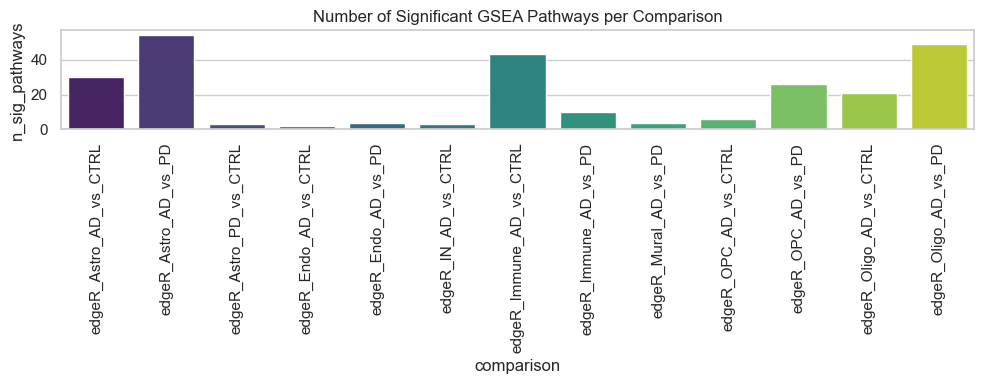

In [93]:
# Number of significant GSEA pathways per comparison (for all 3 databases)
sig = gsea_df[gsea_df["FDR"] < 0.05]

count_df = (
    sig.groupby("comparison")["pathway"]
    .nunique()
    .reset_index()
    .rename(columns = {"pathway": "n_sig_pathways"})
)

plt.figure(figsize= (10, 4))
sns.barplot(data = count_df, x = "comparison", y = "n_sig_pathways", palette = "viridis")

plt.xticks(rotation = 90)
plt.title("Number of Significant GSEA Pathways per Comparison")

plt.tight_layout()
plt.show()

C:\Users\yarad\AppData\Local\Temp\ipykernel_15920\3986604295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = mean_nes, x = "comparison", y = "NES", palette = "coolwarm")


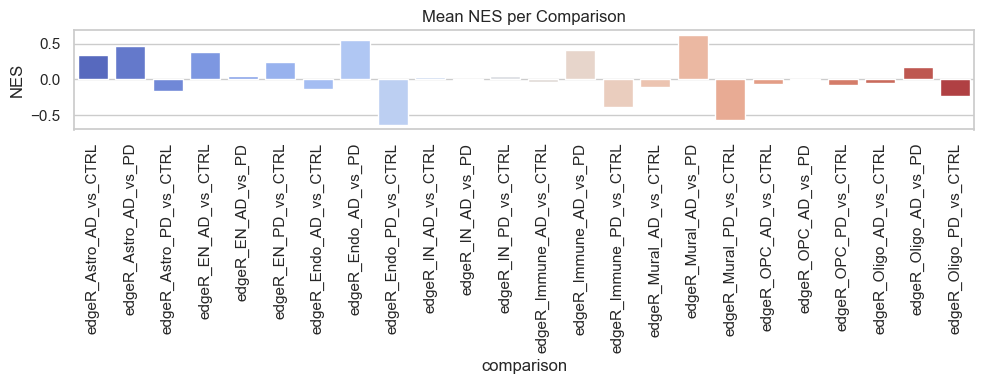

In [94]:
mean_nes = (
    gsea_df.groupby("comparison")["NES"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 4))
sns.barplot(data = mean_nes, x = "comparison", y = "NES", palette = "coolwarm")

plt.xticks(rotation = 90)
plt.title("Mean NES per Comparison")

plt.tight_layout()
plt.show()


### **Volcano Plot Representation of the Results**

In [106]:
volc_dir = "GSEA_volcano_plots"
os.makedirs(volc_dir, exist_ok = True)

def plot_gsea_volcano(df, title):
    # Standardize column names
    df.columns = [c.lower() for c in df.columns]

    # Compute -log10 p-values
    df["logp"] = -np.log10(df["nom p-val"].replace(0, 1e-300))

    # NES sign for color
    df["direction"] = np.where(df["nes"] > 0, "Up-regulated", "Down-regulated")

    # Prepare output filename
    title = title.replace(" ", "_")
    outfile = os.path.join(volc_dir, f"{title}_volcano.png")

    # Volcano plot
    plt.figure(figsize = (10, 7))
    sns.scatterplot(
        data = df,
        x = "nes",
        y = "logp",
        hue = "direction",
        palette = {"Up-regulated": "#1f77b4", "Down-regulated": "#d62728"},
        alpha = 0.8,
        s = 60
    )

    # Thresholds & styling
    plt.axhline(-np.log10(0.05), color = "gray", linestyle = "--")
    plt.axvline(0, color = "black", linewidth = 1)

    plt.title(title, fontsize=15)
    plt.xlabel("Normalized Enrichment Score (NES)", fontsize = 13)
    plt.ylabel("-log10(p-value)", fontsize = 13)
    plt.legend(title="NES direction")
    plt.tight_layout()

    # Save
    plt.savefig(outfile, dpi = 300, bbox_inches = "tight")
    print(f"Saved volcano → {outfile}")
    plt.close()

In [ ]:
# Running the function on all of the GSEA result files
for f in report_files:
    df = pd.read_csv(f)
    name = os.path.basename(os.path.dirname(f))  # folder name = comparison name
    plot_gsea_volcano(df, title = name)

Saved volcano → GSEA_volcano_plots\edgeR_Astro_AD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Astro_AD_vs_PD_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Astro_PD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Endo_AD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Endo_AD_vs_PD_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Endo_PD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_EN_AD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_EN_AD_vs_PD_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_EN_PD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Immune_AD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Immune_AD_vs_PD_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_Immune_PD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_IN_AD_vs_CTRL_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_IN_AD_vs_PD_volcano.png
Saved volcano → GSEA_volcano_plots\edgeR_IN_P

### **Plotting the results for MSigDB**

First, we need to save the GSEA results for MSigDB terms in a separate csv. We first used FDR as the indicator of significance, but it turned out to be too conservative given the number of donors that we have. Therefore, we looked at the pvalue as an indicator of significance instead.

In [33]:
records = []

for rpt in report_files:
    comp_raw = os.path.normpath(rpt).split(os.sep)[-2]

    # Clean comparison name
    comp = (
        comp_raw.replace("edgeR_", "")
        .replace("_GENESYMBOL", "")
        .replace("_", " ")
        .strip()
    )

    df = pd.read_csv(rpt)

    # Keep MSigDB Hallmark only
    if "Term" not in df.columns:
        continue

    msig = df[df["Term"].str.contains("HALLMARK", case = False, na = False)].copy()
    if msig.empty:
        continue

    # Clean pathway name: remove dataset prefix + underscores
    msig["pathway"] = (
        msig["Term"]
        .str.replace("MSigDB Hallmark 2020 ", "", regex = False)
        .str.replace("HALLMARK_", "", regex = False)
        .str.replace("_", " ", regex = False)
        .str.strip()
    )

    # Force numeric conversion
    msig["NES"] = pd.to_numeric(msig["NES"], errors = "coerce")
    msig["comparison"] = comp
    records.append(msig[["comparison", "pathway", "NES", "FDR q-val", "NOM p-val"]])

# Build dataframe
msigdb_df = pd.concat(records, ignore_index = True)
msigdb_df = msigdb_df.dropna(subset = ["NES"])
print("Loaded MSigDB Hallmark results:", msigdb_df.shape)

# Save the dataframe - optional: to avoid rerunning this cell each time you run the pipeline
msigdb_df.to_csv("MSigDB_Hallmark_only_results.csv", index = False)
print("Saved → MSigDB_Hallmark_only_results.csv")

Loaded MSigDB Hallmark results: (1200, 5)
Saved → MSigDB_Hallmark_only_results.csv


Choosing a cutoff to keep significant terms only:

In [ ]:
# msigdb_sig = msigdb_df[msigdb_df["FDR q-value"] < 0.25] # cutoff chosen: 0.25
# print("Significant MSigDB Hallmark results (FDR < 0.25):", msigdb_sig.shape)

Significant MSigDB Hallmark results (pvalue < 0.05): (164, 4)


In [ ]:
msigdb_sig = msigdb_df[msigdb_df["NOM p-val"] < 0.05] # cutoff chosen: 0.05
print("Significant MSigDB Hallmark results (pvalue < 0.05):", msigdb_sig.shape)

Significant MSigDB Hallmark results (pvalue < 0.05): (164, 5)


In [35]:
msigdb_sig

comparison                                          pathway  \
0     Astro AD vs CTRL  MSigDB Hallmark 2020  Interferon Alpha Response   
1     Astro AD vs CTRL  MSigDB Hallmark 2020  Interferon Gamma Response   
2     Astro AD vs CTRL            MSigDB Hallmark 2020  Apical Junction   
3     Astro AD vs CTRL   MSigDB Hallmark 2020  PI3K/AKT/mTOR  Signaling   
4     Astro AD vs CTRL        MSigDB Hallmark 2020  Allograft Rejection   
...                ...                                              ...   
1150    OPC PD vs CTRL  MSigDB Hallmark 2020  Oxidative Phosphorylation   
1151    OPC PD vs CTRL      MSigDB Hallmark 2020  Fatty Acid Metabolism   
1152    OPC PD vs CTRL    MSigDB Hallmark 2020  Cholesterol Homeostasis   
1153    OPC PD vs CTRL   MSigDB Hallmark 2020  IL-6/JAK/STAT3 Signaling   
1156    OPC PD vs CTRL             MSigDB Hallmark 2020  Myc Targets V1   

           NES  FDR q-val  NOM p-val  
0    -1.841254   0.003282   0.000000  
1    -1.722532   0.028715   0.000000  
2     1.438802   0.441807   0.000000  
3     1.432351   0.444603   0.000000  
4    -1.386761   0.826397   0.011765  
...        ...        ...        ...  
1150  1.560070   0.590428   0.000000  
1151  1.398373   0.801703   0.000000  
1152  1.348956   0.852705   0.000000  
1153 -1.338527   1.000000   0.035294  
1156  1.212696   0.876357   0.000000  

[164 rows x 5 columns]

Then, we can plot the results:
- For each condition, per cell type:

In [ ]:
# FDR
os.makedirs("MSigDB_sig_ridgeplots_per_cond_FDR", exist_ok = True)

# pvalue
os.makedirs("MSigDB_sig_ridgeplots_per_cond_pvalue", exist_ok = True)

def plot_msigdb_ridge_by_condition(df, top_n = 20, sigma = 0.25):

    # Clean pathway names
    df = df.copy()
    df["pathway_clean"] = (
        df["pathway"]
        .str.replace("MSigDB Hallmark 2020", "", regex = False)
        .str.replace("_", " ", regex = False)
        .str.strip()
    )

    # Extract celltype
    df["celltype"] = df["comparison"].apply(lambda x: x.split()[0])

    # Loop over each cell type
    for cell in sorted(df["celltype"].unique()):

        df_ct = df[df["celltype"] == cell].copy()
        if df_ct.empty:
            print(f"No MSigDB pathways for {cell}")
            continue

        # All comparisons
        comparisons = sorted(df_ct["comparison"].unique())

        for cmp in comparisons:

            df_cmp = df_ct[df_ct["comparison"] == cmp].copy()
            if df_cmp.empty:
                print(f"Nothing for {cell} under {cmp}")
                continue

            # Select top pathways using FDR q-val or NOM p‑val
            top_paths = (
                #df_cmp.groupby("pathway_clean")["FDR q-val"] #FDR
                df_cmp.groupby("pathway_clean")["NOM p-val"] #pvalue
                      .min()
                      .sort_values()
                      .head(top_n)
                      .index
            )

            df_top = df_cmp[df_cmp["pathway_clean"].isin(top_paths)].copy()
            if df_top.empty:
                print(f"No significant MSigDB pathways for {cell} in {cmp}")
                continue

            # Order plotting by NES
            path_order = (
                df_top.groupby("pathway_clean")["NES"]
                      .mean()
                      .sort_values()
                      .index
            )

            # Range for the x-axis
            nes_min = df_top["NES"].min() - 0.5
            nes_max = df_top["NES"].max() + 0.5
            x = np.linspace(nes_min, nes_max, 400)

            # Plot
            fig, ax = plt.subplots(figsize=(12, 0.6 * len(path_order) + 3))

            y_step = 1.0
            for i, path in enumerate(path_order):

                rows = df_top[df_top["pathway_clean"] == path]
                nes_val = rows["NES"].mean()

                y_base = i * y_step
                curve = np.exp(-0.5 * ((x - nes_val) / sigma)**2)
                curve = curve / curve.max() * 0.8
                y = y_base + curve

                ax.fill_between(x, y_base, y, alpha = 0.45, color = "purple")
                ax.plot(x, y, color = "purple", linewidth = 1)

                ax.text(
                    nes_min - 0.1,
                    y_base,
                    path,
                    ha="right",
                    va="center",
                    fontsize = 9
                )

            ax.axvline(0, color = "grey", linestyle = "--", linewidth = 1)

            ax.set_yticks([])
            ax.set_xlim(nes_min - 0.2, nes_max)
            ax.set_xlabel("NES", fontsize = 13)

            title = f"{cell} – MSigDB Hallmark ridgeplot (top {top_n})\nComparison: {cmp}"
            ax.set_title(fill(title, width = 60), fontsize = 16, pad = 20)

            plt.tight_layout()
            #out = f"MSigDB_sig_ridgeplots_FDR/{cell}_{cmp}_MSigDB_ridgeplot_top{top_n}.png" #FDR
            out = f"MSigDB_sig_ridgeplots_pvalue/{cell}_{cmp}_MSigDB_ridgeplot_top{top_n}.png" #pvalue
            plt.savefig(out, dpi = 300, bbox_inches = "tight")
            plt.close()

            print("Saved:", out)


In [59]:
# Run for all cell types
plot_msigdb_ridge_by_condition(msigdb_df, top_n = 20)

Saved: MSigDB_sig_ridgeplots_FDR/Astro_Astro AD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/Astro_Astro AD vs PD_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/Astro_Astro PD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/EN_EN AD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/EN_EN AD vs PD_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/EN_EN PD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/Endo_Endo AD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/Endo_Endo AD vs PD_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/Endo_Endo PD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/IN_IN AD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/IN_IN AD vs PD_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/IN_IN PD vs CTRL_MSigDB_ridgeplot_top20.png
Saved: MSigDB_sig_ridgeplots_FDR/Immune_Immune AD vs C

- For all three conditions, per cell type:

In [ ]:
sns.set_theme(style = "whitegrid")

def plot_cell_type_ridge(cell, df, top_n = 20, sigma = 0.2):
    df_ct = df[df["celltype"] == cell].copy()
    if df_ct.empty:
        print(f"No rows for cell type {cell}")
        return

    # Top pathways for this cell type
    top_paths = (
        #df_ct.groupby("pathway")["FDR q-val"] # Best FDR across conditions
        df_ct.groupby("pathway")["NOM p-val"] # Best pvalue across conditions
             .min()
             .sort_values()
             .head(top_n) 
             .index
    )
    df_top = df_ct[df_ct["pathway"].isin(top_paths)].copy()

    # Order pathways by mean NES
    path_order = (
        df_top.groupby("pathway")["NES"]
              .mean()
              .sort_values()
              .index
    )

    comps = sorted(df_top["comparison"].unique())
    colors = dict(zip(comps, sns.color_palette("Set2", len(comps))))

    # Common x‑range for all ridges
    nes_min = df_top["NES"].min() - 0.5
    nes_max = df_top["NES"].max() + 0.5
    x = np.linspace(nes_min, nes_max, 400)

    fig, ax = plt.subplots(figsize = (10, 0.5 * len(path_order) + 2))
    y_step = 1.0

    for i, path in enumerate(path_order):
        y_base = i * y_step
        sub = df_top[df_top["pathway"] == path]

        for cmp in comps:
            rows = sub[sub["comparison"] == cmp]
            if rows.empty:
                continue

            nes = rows["NES"].iloc[0]

            # Gaussian "bump" centered at NES
            curve = np.exp(-0.5 * ((x - nes) / sigma) ** 2)
            curve = curve / curve.max() * 0.8  # normalize height

            y = y_base + curve

            ax.fill_between(x, y_base, y,
                            color = colors[cmp], alpha = 0.4)
            ax.plot(x, y, color = colors[cmp], linewidth = 1)

        # Pathway label on the left
        ax.text(nes_min - 0.1, y_base,
                path,
                ha = "right", va = "center", fontsize = 8)

    ax.axvline(0, color = "grey", linestyle = "--", linewidth = 0.8)
    ax.set_yticks([])
    ax.set_xlabel("NES")
    ax.set_xlim(nes_min - 0.2, nes_max)
    ax.set_title(f"{cell} – MSigDB Hallmark ridge-style NES (top {top_n} pathways)",
                 fontsize = 14)

    # Legend for conditions
    handles = [
        plt.Line2D([0], [0], color = colors[c], lw = 3, label = c)
        for c in comps
    ]
    ax.legend(handles = handles, 
              title = "Comparison", 
              bbox_to_anchor = (1.02, 1),
              loc = "upper left", 
              fontsize = 8)

    plt.tight_layout()
    # out = f"MSigDB_sig_ridgeplots_pvalue_FDR/{cell}_MSigDB_ridge.png" #FDR 
    out = f"MSigDB_sig_ridgeplots_pvalue/{cell}_MSigDB_ridge.png" # pvalue
    plt.savefig(out, dpi = 300)
    plt.close()
    print("Saved:", out)

In [43]:
# Run for all cell types
for cell in sorted(msigdb_df["celltype"].unique()):
    plot_cell_type_ridge(cell, msigdb_df, top_n = 20)

Saved: MSigDB_sig_ridgeplots_pvalue/Astro_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/EN_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/Endo_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/IN_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/Immune_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/Mural_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/OPC_MSigDB_ridge.png
Saved: MSigDB_sig_ridgeplots_pvalue/Oligo_MSigDB_ridge.png


### **Plotting the results for GO**

First, we need to save the GSEA results for GO terms in a separate dataframe:

In [ ]:
go_records = []

for rpt in report_files:
    comp_raw = os.path.normpath(rpt).split(os.sep)[-2]
    comp = comp_raw.replace("edgeR_", "").replace("_GENESYMBOL", "")

    df = pd.read_csv(rpt)
    if "Term" not in df.columns:
        continue

    # Keep GO Biological Process only
    go = df[df["Term"].str.contains("GO_Biological_Process", case = False, na = False)].copy()
    if go.empty:
        continue

    go["comparison"] = comp
    go["pathway"] = (
        go["Term"]
        .str.replace("GO_Biological_Process_2021", "", regex = False)
        .str.replace("GO_Biological_Process", "", regex = False)
        .str.replace("_", " ", regex=False)
        .str.strip()
    )

    go["NES"] = pd.to_numeric(go["NES"], errors = "coerce")
    go_records.append(go[["comparison", "pathway", "NES", "NOM p-val", "FDR q-val"]])

go_df = pd.concat(go_records, ignore_index = True)
go_df = go_df.dropna(subset = ["NES"])

# Same celltype parsing:
go_df["celltype"] = go_df["comparison"].str.split("_").str[0]

# Save the dataframe - optional: to avoid rerunning this cell each time you run the pipeline
#go_df.to_csv("GO_only_results.csv", index = False)
#print("Saved → GO_only_results.csv")

Saved → GO_only_results.csv


In [46]:
go_df.head()

comparison                                            pathway  \
0  Astro_AD_vs_CTRL  vascular endothelial growth factor receptor si...   
1  Astro_AD_vs_CTRL  SRP-dependent cotranslational protein targetin...   
2  Astro_AD_vs_CTRL               protein targeting to ER (GO:0045047)   
3  Astro_AD_vs_CTRL  cotranslational protein targeting to membrane ...   
4  Astro_AD_vs_CTRL               cytoplasmic translation (GO:0002181)   

        NES  NOM p-val  FDR q-val celltype  
0  2.030360        0.0   0.014583    Astro  
1 -2.012572        0.0   0.000000    Astro  
2 -2.005992        0.0   0.000000    Astro  
3 -1.975461        0.0   0.000000    Astro  
4 -1.962412        0.0   0.000000    Astro

In [ ]:
# # Selecting an FDR cutoff to determine significativity
# GO_sig = go_df[go_df["FDR q-val"] < 0.25] # cutoff chosen: 0.05
# print("Significant GO Biological Process results (FDR < 0.25):", GO_sig.shape)

Significant GO Biological Process results (FDR < 0.05): (1910, 5)


In [47]:
# Selecting an pvalue cutoff to determine significativity
GO_sig = go_df[go_df["NOM p-val"] < 0.05] # cutoff chosen: 0.05
print("Significant GO Biological Process results (pvalue < 0.05):", GO_sig.shape)

Significant GO Biological Process results (pvalue < 0.05): (6955, 6)


In [48]:
GO_sig

comparison                                            pathway  \
0       Astro_AD_vs_CTRL  vascular endothelial growth factor receptor si...   
1       Astro_AD_vs_CTRL  SRP-dependent cotranslational protein targetin...   
2       Astro_AD_vs_CTRL               protein targeting to ER (GO:0045047)   
3       Astro_AD_vs_CTRL  cotranslational protein targeting to membrane ...   
4       Astro_AD_vs_CTRL               cytoplasmic translation (GO:0002181)   
...                  ...                                                ...   
105401    OPC_PD_vs_CTRL  sulfur compound biosynthetic process (GO:0044272)   
105411    OPC_PD_vs_CTRL                       gene expression (GO:0010467)   
105505    OPC_PD_vs_CTRL  positive regulation of gene expression (GO:001...   
105512    OPC_PD_vs_CTRL        mRNA splicing, via spliceosome (GO:0000398)   
105594    OPC_PD_vs_CTRL  ubiquitin-dependent protein catabolic process ...   

             NES  NOM p-val  FDR q-val celltype  
0       2.030360        0.0   0.014583    Astro  
1      -2.012572        0.0   0.000000    Astro  
2      -2.005992        0.0   0.000000    Astro  
3      -1.975461        0.0   0.000000    Astro  
4      -1.962412        0.0   0.000000    Astro  
...          ...        ...        ...      ...  
105401  1.105811        0.0   0.920340      OPC  
105411  1.103995        0.0   0.920193      OPC  
105505  1.087419        0.0   0.915794      OPC  
105512  1.086868        0.0   0.914970      OPC  
105594  1.069660        0.0   0.917276      OPC  

[6955 rows x 6 columns]

Now, we can plot the results:

In [50]:
sns.set_theme(style = "whitegrid")
#os.makedirs("GO_sig_ridgeplots_FDR", exist_ok = True)
#os.makedirs("GO_sig_ridgeplots_per_cond_FDR", exist_ok = True)

os.makedirs("GO_sig_ridgeplots_pvalue", exist_ok = True)
os.makedirs("GO_sig_ridgeplots_per_cond_pvalue", exist_ok = True)

# First, define a function to clean GO labels for a more readable ridgeplot
def clean_go_label(term: str) -> str:
    s = str(term).strip()

    # Remove ANY "GO Biological Process ..." prefix no matter spacing or underscore pattern
    s = re.sub(r"^GO[\s_]*Biological[\s_]*Process[\s_]*\d{4}\s*", "", s)

    # Remove GO ID suffix "(GO:xxxxxxx)"
    s = re.sub(r"\(GO:\s*\d+\)", "", s)

    # Clean remaining underscores and trim spaces
    s = s.replace("_", " ")
    return " ".join(s.split())

In [51]:
# Then, define the function to plot the results for GO terms in a ridgeplot
def plot_go_ridge(cell, df, top_n = 20, sigma = 0.25):
    """
    Ridge‑style NES plot for one cell type across all comparisons.
    Uses simple Gaussians centered at NES for each (pathway, comparison).
    """

    df_ct = df[df["celltype"] == cell].copy()
    if df_ct.empty:
        print(f"No GO BP rows for {cell}")
        return

    # Clean pathway names
    df_ct["pathway_clean"] = df_ct["pathway"].apply(clean_go_label)

    # Select top pathways across comparisons
    top_paths = (
        #df_ct.groupby("pathway_clean")["FDR q-val"] # best/min FDR
        df_ct.groupby("pathway_clean")["NOM p-val"] # best/min p-value
             .min()
             .sort_values()
             .head(top_n)
             .index
    )
    df_top = df_ct[df_ct["pathway_clean"].isin(top_paths)].copy()

    # Order pathways by mean NES (bottom→top)
    path_order = (
        df_top.groupby("pathway_clean")["NES"]
              .mean()
              .sort_values()
              .index
    )

    # Comparisons & colors
    comps = sorted(df_top["comparison"].unique())
    colors = dict(zip(comps, sns.color_palette("Set2", len(comps))))

    # Common x‑axis range
    nes_min = df_top["NES"].min() - 0.5
    nes_max = df_top["NES"].max() + 0.5
    x = np.linspace(nes_min, nes_max, 400)

    # Figure dimensions
    fig, ax = plt.subplots(figsize = (12, 0.6 * len(path_order) + 3))
    y_step = 1.0

    for i, path in enumerate(path_order):
        y_base = i * y_step
        sub = df_top[df_top["pathway_clean"] == path]

        for cmp in comps:
            rows = sub[sub["comparison"] == cmp]
            if rows.empty:
                continue

            nes = rows["NES"].iloc[0]

            # Gaussian "ridge" centered at NES
            curve = np.exp(-0.5 * ((x - nes) / sigma) ** 2)
            curve = curve / curve.max() * 0.8 
            y = y_base + curve

            ax.fill_between(x, y_base, y, color = colors[cmp], alpha = 0.45)
            ax.plot(x, y, color = colors[cmp], linewidth = 1)

        # Pathway label on the left
        ax.text(
            nes_min - 0.1, y_base,
            path,
            ha = "right", 
            va = "center", 
            fontsize = 9
        )

    # Vertical NES = 0 line
    ax.axvline(0, color = "grey", linestyle = "--", linewidth = 1)

    ax.set_yticks([])
    ax.set_xlim(nes_min - 0.2, nes_max)
    ax.set_xlabel("NES", fontsize = 13)

    title = f"{cell} – GO Biological Process ridge ‑ style NES (top {top_n} pathways)"
    ax.set_title(fill(title, width=60), fontsize=16, pad=20)

    # Legend
    handles = [
        plt.Line2D([0], [0], color = colors[c], lw = 3, label = c)
        for c in comps
    ]
    ax.legend(handles = handles, 
              title = "Comparison",
              bbox_to_anchor = (1.02, 1), 
              loc = "upper left", 
              fontsize = 9)

    plt.tight_layout()

    # out = f"GO_sig_ridgeplots_FDR/{cell}_GO_BP_ridgeplot_top{top_n}.png"
    out = f"GO_sig_ridgeplots_pvalue/{cell}_GO_BP_ridgeplot_top{top_n}.png"
    plt.savefig(out, dpi = 300, bbox_inches = "tight")
    plt.close()

    print("Saved:", out)

In [52]:
#Finally, plot the results for each cell type (for all three studied conditions)
for cell in sorted(GO_sig["celltype"].unique()):
    plot_go_ridge(cell, GO_sig, top_n = 20)

C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/Astro_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/EN_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/Endo_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/IN_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/Immune_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/Mural_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/OPC_GO_BP_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:97: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yarad\AppData\Local\Temp\ipykernel_18348\608164589.py:101: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.savefig(out, dpi = 300, bbox_inches = "tight")


Saved: GO_sig_ridgeplots_pvalue/Oligo_GO_BP_ridgeplot_top20.png


We can also plot the results for each cell type and for each condition separately:

In [53]:
def plot_go_ridge_by_condition(cell, df, top_n = 20, sigma = 0.25):
    """
    Generate SEPARATE ridgeplots per comparison:
      • AD_vs_CTRL
      • PD_vs_CTRL
      • AD_vs_PD
    """

    df_ct = df[df["celltype"] == cell].copy()
    if df_ct.empty:
        print(f"No GO BP rows for {cell}")
        return

    # Clean pathway names
    df_ct["pathway_clean"] = df_ct["pathway"].apply(clean_go_label)

    # Which comparisons exist?
    comparisons = sorted(df_ct["comparison"].unique())

    for cmp in comparisons:
        df_cmp = df_ct[df_ct["comparison"] == cmp].copy()
        if df_cmp.empty:
            continue

        # Select top pathways within this comparison
        top_paths = (
            #df_cmp.groupby("pathway_clean")["FDR q-val"]
            df_cmp.groupby("pathway_clean")["NOM p-val"]
                  .min()
                  .sort_values()
                  .head(top_n)
                  .index
        )
        df_top = df_cmp[df_cmp["pathway_clean"].isin(top_paths)].copy()

        if df_top.empty:
            print(f"No significant pathways for {cell} in {cmp}")
            continue

        # Order pathways by NES (bottom to top)
        path_order = (
            df_top.groupby("pathway_clean")["NES"]
                  .mean()
                  .sort_values()
                  .index
        )

        # Common x-range
        nes_min = df_top["NES"].min() - 0.5
        nes_max = df_top["NES"].max() + 0.5
        x = np.linspace(nes_min, nes_max, 400)

        # Figure
        fig, ax = plt.subplots(figsize=(12, 0.6 * len(path_order) + 3))
        y_step = 1.0

        for i, path in enumerate(path_order):
            y_base = i * y_step
            row = df_top[df_top["pathway_clean"] == path].iloc[0]

            nes = row["NES"]

            # Gaussian curve
            curve = np.exp(-0.5 * ((x - nes) / sigma) ** 2)
            curve = curve / curve.max() * 0.8
            y = y_base + curve

            ax.fill_between(x, y_base, y, alpha = 0.45, color = "steelblue")
            ax.plot(x, y, color = "steelblue", linewidth = 1)

            # Label
            ax.text(
                nes_min - 0.1,
                y_base,
                path,
                ha = "right",
                va = "center",
                fontsize = 9
            )

        # NES = 0 line
        ax.axvline(0, color = "grey", linestyle = "--", linewidth = 1)

        ax.set_yticks([])
        ax.set_xlim(nes_min - 0.2, nes_max)
        ax.set_xlabel("NES", fontsize=13)

        title = f"{cell} – GO BP ridgeplot (top {top_n})\nComparison: {cmp}"
        ax.set_title(fill(title, width = 60), fontsize = 16, pad = 20)

        plt.tight_layout()

        #out = f"GO_sig_ridgeplots_per_cond_FDR/{cell}_GO_BP_{cmp}_ridgeplot_top{top_n}.png"
        out = f"GO_sig_ridgeplots_per_cond_pvalue/{cell}_GO_BP_{cmp}_ridgeplot_top{top_n}.png"
        plt.savefig(out, dpi = 300, bbox_inches = "tight")
        plt.close()

        print("Saved:", out)

In [54]:
#Finally, plot the results for each cell type (for all three studied conditions)
for cell in sorted(GO_sig["celltype"].unique()):
    plot_go_ridge_by_condition(cell, GO_sig, top_n = 20)

Saved: GO_sig_ridgeplots_per_cond_pvalue/Astro_GO_BP_Astro_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/Astro_GO_BP_Astro_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/Astro_GO_BP_Astro_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/EN_GO_BP_EN_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/EN_GO_BP_EN_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/EN_GO_BP_EN_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/Endo_GO_BP_Endo_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/Endo_GO_BP_Endo_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/Endo_GO_BP_Endo_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/IN_GO_BP_IN_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/IN_GO_BP_IN_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots_per_cond_pvalue/IN_GO_BP_IN_P